In [21]:
# add tools and modules contained within tools (numpy, scipy, pandas, blabla)
import sys
sys.path.insert(0, "../../library")
from bikbox import *
from LIDAR import *

from collections import namedtuple

from os import path

from scipy.stats import linregress

# configure matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn

from windrose import WindroseAxes

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

from mpl_toolkits.mplot3d import Axes3D

from math import sqrt
from math import log

from scipy.signal import find_peaks

from glob import glob

import io       # used to generate a string buffer

from zipfile import ZipFile

# enable auto reloading of external modules
%reload_ext autoreload
%autoreload 2

# %matplotlib ipympl
# %matplotlib widget
%matplotlib notebook
# %matplotlib inline

sen_green = '#1f986d'

single_column_size = (3.22, 3.22)
double_column_size = (6.44, 3.22)

# matplotlib config

mpl.rcParams['figure.figsize'] = [7.0, 6.0]
#mpl.rcParams['figure.dpi'] = 15
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 12
#mpl.rcParams['legend.fontsize'] = 'large'
#mpl.rcParams['figure.titlesize'] = 'medium'

#axes.spines.left   : True   ## display axis spines
#axes.spines.bottom : True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')

plt.style.use('seaborn-ticks')
plt.rc("axes.spines", top=False, right=False)
font = {'family' : "Times New Roman",
        'size'   : 16}

plt.rc('font', **font)

cmap = plt.get_cmap('jet', 14)

def cc(n=14):
    return iter(cm.viridis(np.linspace(0,1,14)))

labelmap = dict()

linCorr = namedtuple('linCorr', 'slope intercept r_value p_value std_err')

i = 1

for bwdir in sorted(glob('../../../data/BW??')):
    bw = bwdir.split('/')[-1]
    # if bw in ('BW74', 'BW76',): continue
    fused_file = '{}/{}_fused_EuroDyn20.pickle'.format(bwdir, bw)
    if path.isfile(fused_file):
        print(bw)
        labelmap[bw] = 'OWT {}'.format(i)
        i += 1


BW45
BW57
BW59
BW60
BW67
BW68
BW70
BW71
BW73
BW74
BW75
BW76
BW77


# EURODYN 2020

This notebook is used to generate the data figures for the corresponding conference-paper, titled __Relative Motion during Single Blade Installation: Measurements from the North Sea__


## Data and Methods

start with the data from the damper measurements:

In [2]:
turbines_tmd = dict()
for d in ['BW20', 'BW11', 'BW10', 'BW30']:
    path = '../../../data/{}/{}_fused_damper.pickle'.format(d, d)
    if not isfile(path):
        raise Exception('could not find file: {}'.format(path))
    turbines_tmd[d] = pd.read_pickle(path)

Here go the datasets of the 'normal' installations

In [3]:
turbines = dict()
for turbine in labelmap:    # contains all cases with valid data
    print(turbine)
    datafile = '../../../data/{}/{}_fused_EuroDyn20.pickle'.format(turbine, turbine)
    if isfile(datafile):
        print('reading in datafile: {}'.format(datafile))
        turbines[turbine] = pd.read_pickle(datafile)

BW45
reading in datafile: ../../../data/BW45/BW45_fused_EuroDyn20.pickle
BW57
reading in datafile: ../../../data/BW57/BW57_fused_EuroDyn20.pickle
BW59
reading in datafile: ../../../data/BW59/BW59_fused_EuroDyn20.pickle
BW60
reading in datafile: ../../../data/BW60/BW60_fused_EuroDyn20.pickle
BW67
reading in datafile: ../../../data/BW67/BW67_fused_EuroDyn20.pickle
BW68
reading in datafile: ../../../data/BW68/BW68_fused_EuroDyn20.pickle
BW70
reading in datafile: ../../../data/BW70/BW70_fused_EuroDyn20.pickle
BW71
reading in datafile: ../../../data/BW71/BW71_fused_EuroDyn20.pickle
BW73
reading in datafile: ../../../data/BW73/BW73_fused_EuroDyn20.pickle
BW74
reading in datafile: ../../../data/BW74/BW74_fused_EuroDyn20.pickle
BW75
reading in datafile: ../../../data/BW75/BW75_fused_EuroDyn20.pickle
BW76
reading in datafile: ../../../data/BW76/BW76_fused_EuroDyn20.pickle
BW77
reading in datafile: ../../../data/BW77/BW77_fused_EuroDyn20.pickle


In [4]:
freq = np.genfromtxt('../../../data/BW10/spectral/Figure1Frequency.txt')
time = np.genfromtxt('../../../data/BW10/spectral/Figure1Time.txt')
specY = np.genfromtxt('../../../data/BW10/spectral/Figure1Spectroy.txt')
specX = np.genfromtxt('../../../data/BW10/spectral/Figure1Spectrox.txt')
acc = np.genfromtxt('../../../data/BW10/spectral/Figure1.txt')

## Figures for visualizing the post-processing process

The following plots are used in the results section to depict the data processing pipeline

In [5]:
d = pd.read_pickle('../../../data/BW77/BW77_HeliHoist_Integrals_EuroDyn20.pickle')

In [6]:
df = pd.read_pickle('../../../data/BW77/BW77_fused_EuroDyn20.pickle')

In [9]:
helihoist_1 = pd.read_pickle('../../../data/BW77/BW77_SBITRoot_1.pickle')
helihoist_2 = pd.read_pickle('../../../data/BW77/BW77_SBITRoot_2.pickle')

<IPython.core.display.Javascript object>


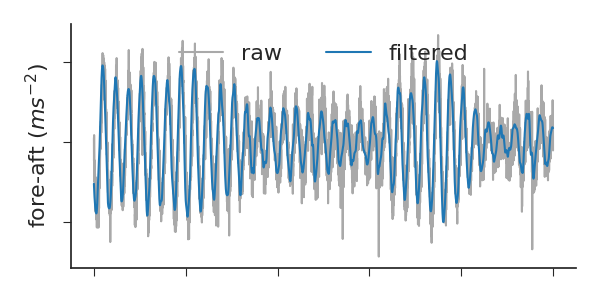

/home/san/.local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>


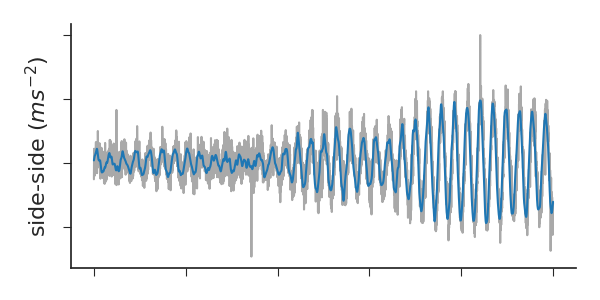

<IPython.core.display.Javascript object>


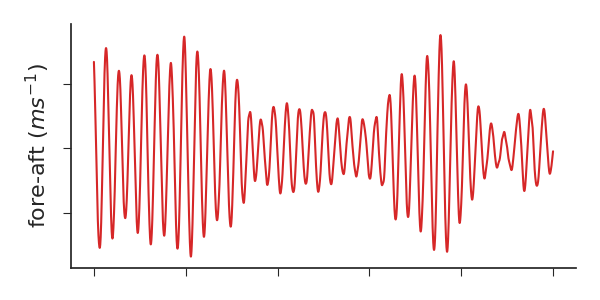

<IPython.core.display.Javascript object>


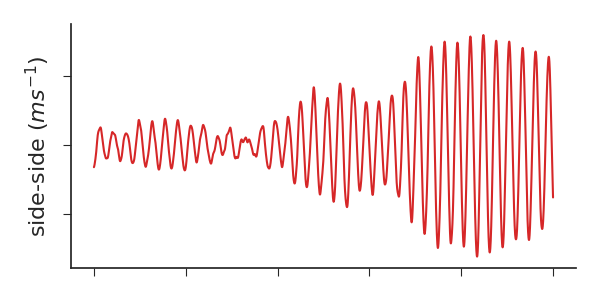

<IPython.core.display.Javascript object>


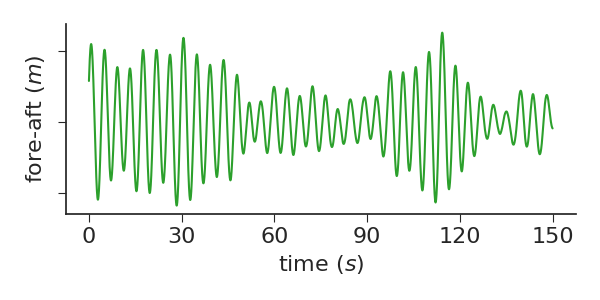

<IPython.core.display.Javascript object>


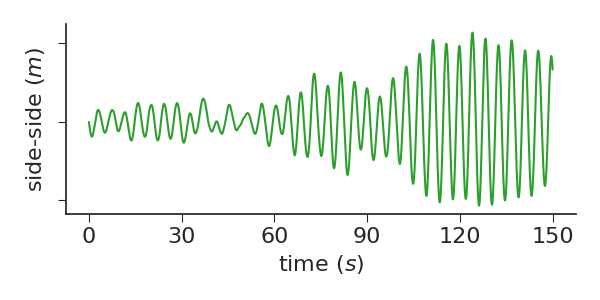

<IPython.core.display.Javascript object>


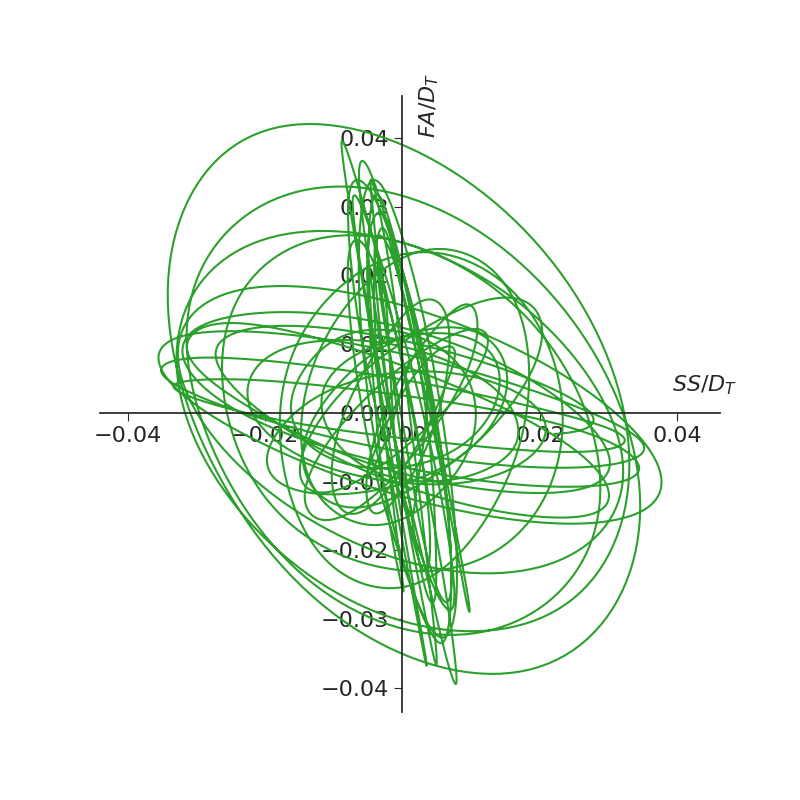

No handles with labels found to put in legend.


In [7]:
start=pd.to_datetime('2019-09-04 11:43:30').tz_localize('Europe/Berlin')
stop=pd.to_datetime('2019-09-04 11:46:00').tz_localize('Europe/Berlin')

plt.figure(figsize=(6,3))
plt.plot(d[start:stop].acc_xr, color='darkgrey', label='raw')
plt.plot(d[start:stop].acc_xrf, label='filtered')
ax = plt.gca()
ax.legend(ncol=2, loc='upper center')
ax.set_ylabel('fore-aft $(m s^{-2})$')
ax.set_yticklabels([])
#ax.set_xlabel('time $(s)$')
#ax.set_xticklabels([0, 30, 60, 90, 120, 150])
axb
plt.tight_layout()
plt.savefig('FIG2_accFA.svg')
#seaborn.despine(offset=10)

plt.figure(figsize=(6,3))
plt.plot(d[start:stop].acc_zr, color='darkgrey', label='raw')
plt.plot(d[start:stop].acc_zrf, label='filtered')
ax = plt.gca()
ax.set_ylabel('side-side $(m s^{-2})$')
ax.set_yticklabels([])
#ax.set_xlabel('time $(s)$')
#ax.set_xticklabels([0, 30, 60, 90, 120, 150])
ax.set_xticklabels([])
plt.tight_layout()
plt.savefig('FIG2_accSS.svg')

plt.figure(figsize=(6,3))
plt.plot(d[start:stop].vel_x, color='tab:red')
ax = plt.gca()
ax.set_ylabel('fore-aft $(m s^{-1})$')
ax.set_yticklabels([])
#ax.set_xlabel('time $(s)$')
#ax.set_xticklabels([0, 30, 60, 90, 120, 150])
ax.set_xticklabels([])
#ax.set_xticks([])
plt.tight_layout()
plt.savefig('FIG2_velFA.svg')

plt.figure(figsize=(6,3))
plt.plot(d[start:stop].vel_z, color='tab:red')
ax = plt.gca()
ax.set_ylabel('side-side $(m s^{-1})$')
ax.set_yticklabels([])
#ax.set_xlabel('time $(s)$')
#ax.set_xticklabels([0, 30, 60, 90, 120, 150])
ax.set_xticklabels([])
plt.tight_layout()
plt.savefig('FIG2_velSS.svg')

plt.figure(figsize=(6,3))
plt.plot(d[start:stop].pos_x, color='tab:green')
ax = plt.gca()
ax.set_ylabel('fore-aft $(m)$')
ax.set_yticklabels([])
ax.set_xlabel('time $(s)$')
ax.set_xticklabels([0, 30, 60, 90, 120, 150])
plt.tight_layout()
plt.savefig('FIG2_posFA.svg')

plt.figure(figsize=(6,3))
plt.plot(d[start:stop].pos_z, color='tab:green')
ax = plt.gca()
ax.set_ylabel('side-side $(m)$')
ax.set_yticklabels([])
ax.set_xlabel('time $(s)$')
ax.set_xticklabels([0, 30, 60, 90, 120, 150])
plt.tight_layout()
plt.savefig('FIG2_posSS.svg')

plt.figure(figsize=(8,8))
plt.plot(d[start:stop].pos_z / 6, d[start:stop].pos_x / 6, color='tab:green')
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend()
ax.set_xlabel('$SS / D_T$')
ax.set_ylabel('$FA / D_T$')
ax.xaxis.set_label_coords(0.975, 0.55)
ax.yaxis.set_label_coords(0.55, 0.985)

ax.axis('equal')
plt.savefig('FIG2_orbit.svg')


<IPython.core.display.Javascript object>


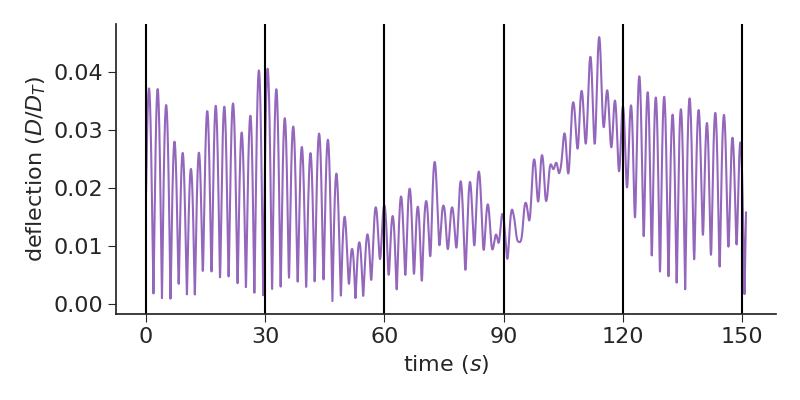

2019-09-04 11:43:30+02:00 0.1253938185570159
2019-09-04 11:44:00+02:00 0.09565141280994871
2019-09-04 11:44:30+02:00 0.08211758379860268
2019-09-04 11:45:00+02:00 0.15186534872334873
2019-09-04 11:45:30+02:00 0.14052095678213578
2019-09-04 11:46:00+02:00 0.06390107259881737


<IPython.core.display.Javascript object>


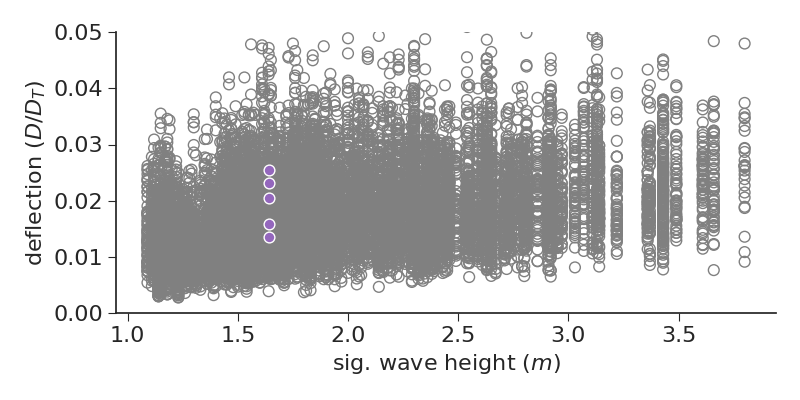

<IPython.core.display.Javascript object>


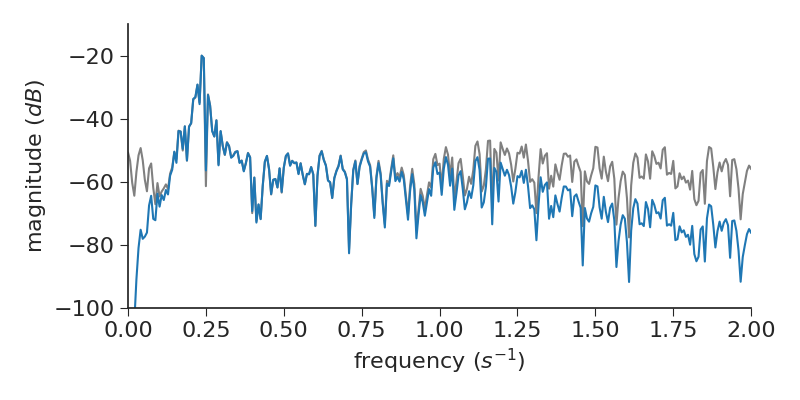

<IPython.core.display.Javascript object>


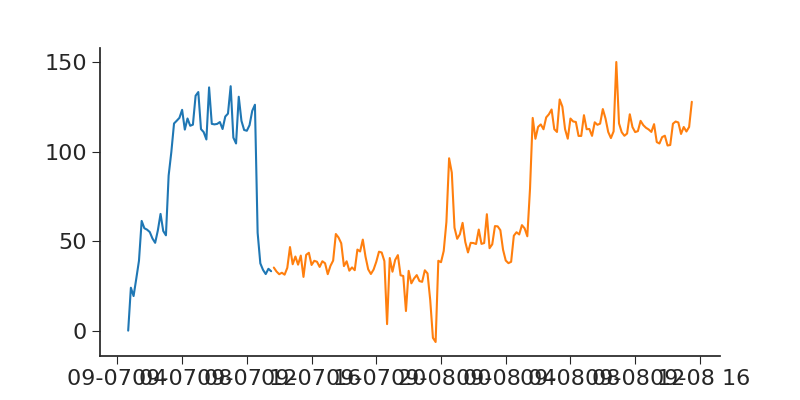

In [10]:
start=pd.to_datetime('2019-09-04 11:43:30').tz_localize('Europe/Berlin')
stop=pd.to_datetime('2019-09-04 11:46:01').tz_localize('Europe/Berlin')

plt.figure(figsize=(8,4))

plt.plot(d[start:stop].deflection / 6,
         color = 'tab:purple'
        )
ax = plt.gca()
#ax2.set_xticks([])
ax.set_ylabel('deflection $(D / D_T)$')
ax.set_xlabel('time $(s)$')
ax.set_xticklabels([0, 30, 60, 90, 120, 150])

for t, data in d[start:stop].resample('30s'):
    print(t,data.deflection.mean())
    plt.axvline(x=t, color='k')
    
plt.tight_layout()
plt.savefig('FIG2_deflection.svg', dpi=150)

start=pd.to_datetime('2019-09-04 11:43:31').tz_localize('Europe/Berlin')
stop=pd.to_datetime('2019-09-04 11:45:59').tz_localize('Europe/Berlin')

plt.figure(figsize=(8,4))
plt.scatter(df.Hs.resample('30s').mean(),
            df.deflection.resample('30s').mean()/6,
            color='',
            edgecolor='grey',
            s=60
           )
plt.scatter(df[start:stop].Hs.resample('30s').mean(),
            df[start:stop].deflection.resample('30s').mean()/6,
            edgecolor='w',
            color='tab:purple',
            s=60
           )
plt.ylim([0,0.05])
plt.ylabel('deflection $(D / D_T)$')
plt.xlabel('sig. wave height $(m)$')
plt.tight_layout()
plt.savefig('FIG2_scatter.png', dpi=150, transparent=True)


plt.figure(figsize=(8,4))
#magnitude_spectrum(s, Fs=Fs, color='C1')
plt.magnitude_spectrum(d[start:stop].acc_xr, 1/0.033, scale='dB', color='grey')
plt.magnitude_spectrum(d[start:stop].acc_xrf, 1/0.033, scale='dB', color='tab:blue')
plt.xlim([0,2])
plt.ylim([-100, -10])
plt.ylabel('magnitude $(dB)$')
plt.xlabel('frequency $(s^{-1})$')
plt.tight_layout()
plt.savefig('FIG2_spectrum.svg', transparent=True)

plt.figure(figsize=(8,4))
plt.plot(helihoist_1.elevation.resample('10min').mean())
plt.plot(helihoist_2.elevation.resample('10min').mean())

In [11]:
BW57_SBIT = pd.read_pickle('../../../data/BW57/BW57_SBITRoot.pickle')

<IPython.core.display.Javascript object>


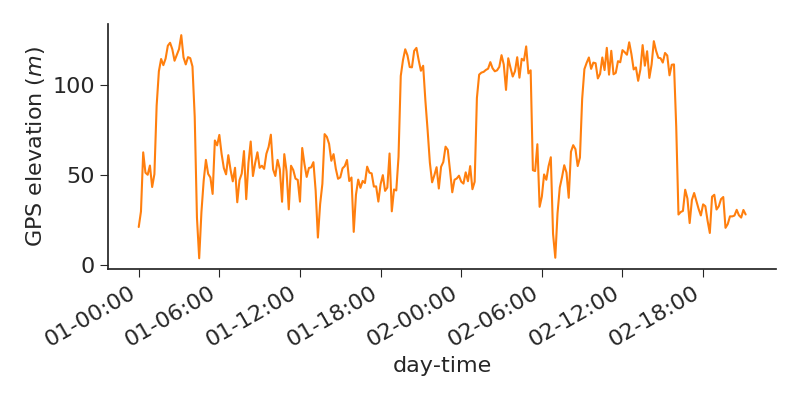

In [26]:
BW57_SBIT.index = pd.to_datetime(BW57_SBIT.index - BW57_SBIT.index[0])
plt.figure(figsize=(8,4))
plt.plot(BW57_SBIT.elevation.resample('10min').mean(), color='tab:orange')
plt.ylabel('GPS elevation ($m$)')
plt.xlabel('day-time')
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:00"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%H:00"))
#ax2 = ax.twinx()
#ax2.plot(BW57_SBIT.elevation.resample('10min').mean(), color='tab:blue')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('FIG2_GPSElevation.svg', transparend=True)

## RESULTS

The structure of the results section is as follows:

**FIG3: Time series of deflections with and without damper**

**FIG4: Scatter Plots of deflection vs. Environmental data**

start with a scatter plot of the installations with an active damper 

### FIG3: Time Series

In [16]:
BW57 = turbines['BW57'].copy()
BW57_orgStart = BW57.index[0]
BW57.index = pd.to_datetime(BW57.index - BW57.index[0])

BW20 = pd.read_pickle('../../../data/BW20/BW20_fused_EuroDyn20_comparison.pickle')
BW20.index = pd.to_datetime(BW20.index - BW20.index[0])

BW10 = pd.read_pickle('../../../data/BW10/BW10_fused_damper.pickle')
BW10.index = pd.to_datetime(BW10.index - BW10.index[0])

/home/san/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/san/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/san/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
## set font 
font = {'family' : "DejaVu Sans",
        'size'   : 12}

plt.rc('font', **font)

<IPython.core.display.Javascript object>


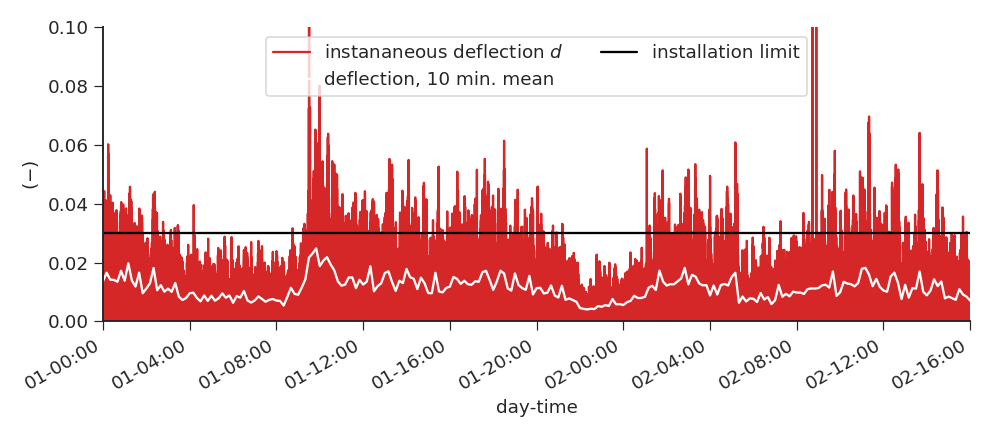

In [27]:
BW57_start = pd.to_datetime('1970-01-01 01:00').tz_localize('Europe/Berlin')
BW57_stop = pd.to_datetime('1970-01-02 17:00').tz_localize('Europe/Berlin')

plt.figure(figsize=(9,4))
plt.plot(BW57.deflection/6, color='tab:red', label='instananeous deflection $d$')
plt.plot(BW57.deflection.resample('10min').mean()/6, color='white', label='deflection, 10 min. mean')
plt.axhline(y=0.03, label='installation limit', color='k')
plt.xlabel('day-time')
plt.ylabel('$(-)$')
plt.legend(loc='upper center', ncol=2, frameon=True, fancybox=True)
plt.ylim([0,0.1])
plt.xlim([BW57_start, BW57_stop])
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:00"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%H:00"))
#ax2 = ax.twinx()
#ax2.plot(BW57_SBIT.elevation.resample('10min').mean(), color='tab:blue')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('FIG3_turbine.png',dpi=150)


<IPython.core.display.Javascript object>


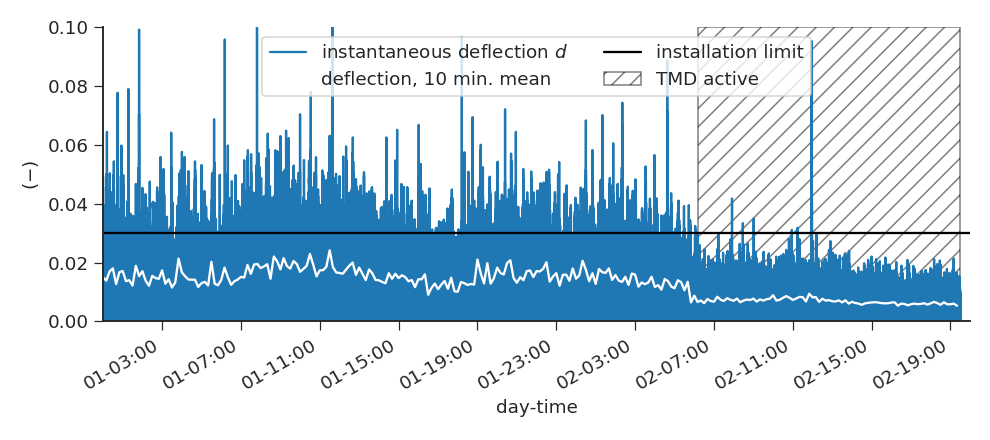

In [28]:
BW20_start = pd.to_datetime('1970-01-01 01:00').tz_localize('Europe/Berlin')
BW20_stop = pd.to_datetime('1970-01-02 21:00').tz_localize('Europe/Berlin')
tmd_on=pd.to_datetime('1970-01-02 07:10').tz_localize('Europe/Berlin')
tmd_off=pd.to_datetime('1970-01-02 20:30').tz_localize('Europe/Berlin')

plt.figure(figsize=(9,4))
plt.axvspan(tmd_on, tmd_off, fill=False, alpha = 0.5, edgecolor='k', hatch='//' , label='TMD active')
plt.plot(BW20.deflection/6, color='tab:blue', label='instantaneous deflection $d$')
plt.plot(BW20.deflection.resample('10min').mean()/6, color='white', label='deflection, 10 min. mean')
plt.axhline(y=0.03, label='installation limit', color='k')
plt.xlabel('day-time')
plt.ylabel('$(-)$')
plt.legend(loc='upper center', ncol=2, frameon=True, fancybox=True)
plt.ylim([0,0.1])
plt.xlim([BW20_start,BW20_stop])
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:00"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%H:00"))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('FIG3_turbine_TMD.png',dpi=150)

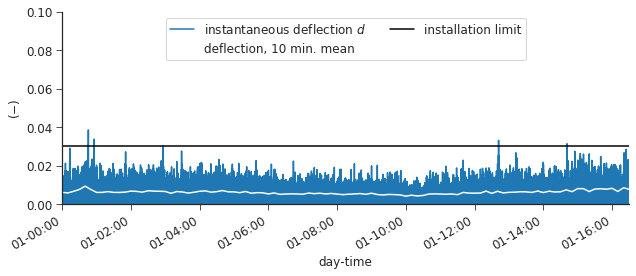

In [20]:
BW10_start = pd.to_datetime('1970-01-01 01:00').tz_localize('Europe/Berlin')
BW10_stop = pd.to_datetime('1970-01-01 17:30').tz_localize('Europe/Berlin')
#tmd_on=pd.to_datetime('1970-01-02 07:10').tz_localize('Europe/Berlin')
#tmd_off=pd.to_datetime('1970-01-02 20:30').tz_localize('Europe/Berlin')

plt.figure(figsize=(9,4))
#plt.axvspan(tmd_on, tmd_off, fill=False, alpha = 0.5, edgecolor='k', hatch='//' , label='TMD active')
plt.plot(BW10.deflection/6, color='tab:blue', label='instantaneous deflection $d$')
plt.plot(BW10.deflection.resample('10min').mean()/6, color='white', label='deflection, 10 min. mean')
plt.axhline(y=0.03, label='installation limit', color='k')
plt.xlabel('day-time')
plt.ylabel('$(-)$')
plt.legend(loc='upper center', ncol=2, frameon=True, fancybox=True)
plt.ylim([0,0.1])
plt.xlim([BW10_start,BW10_stop])
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H:00"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%H:00"))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('FIG3_turbine_TMD_V2.png',dpi=150)

### FIG4: Scatter plots

<IPython.core.display.Javascript object>


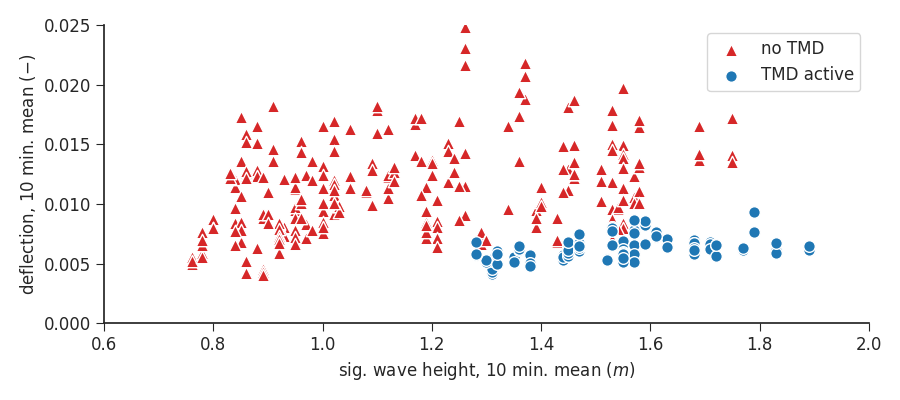

In [49]:
plt.figure(figsize=(9,4))

plt.scatter(turbines['BW57'].Hs.resample('10min').mean(),
            turbines['BW57'].deflection.resample('10min').mean()/6,
            s=80,
            color='tab:red',
            edgecolor='white',
            marker='^',
            label='no TMD',
           )


plt.scatter(BW10.Hs.resample('10min').mean(),
            BW10.deflection.resample('10min').mean()/6,
            s=70,
            color='tab:blue',
            edgecolor='white',
            marker='o',
            label='TMD active'
            
           )


#lelem = [Line2D([0], [0], marker='o', color='tab:purple', label='no TMD', markerfacecolor='w', markersize=8, ls=''),
#         Line2D([0], [0], marker='o', color='k', label='TMD active', markerfacecolor='tab:purple', markersize=8, ls='')
#        ]
plt.legend(frameon=True, fancybox=True)

plt.ylim([0,0.025])
plt.xlim([0.6,2])
plt.xlabel('sig. wave height, 10 min. mean $(m)$')
plt.ylabel('deflection, 10 min. mean $(-)$')
plt.tight_layout()
plt.savefig('FIG3_scatter_comparison.png')

### calculate correlations

In [7]:
df = pd.concat([turbines[k] for k in turbines])

In [8]:
df_tmd = pd.concat([turbines_tmd[k] for k in turbines_tmd])

In [9]:
Hs10 = df.Hs.resample('10min').mean()
d10 = df.deflection.resample('10min').mean()/6
U10 = df.wind_speed.resample('10min').mean()
Tp10 = df.Tz.resample('10min').mean()*1.28

Hs10.dropna(inplace=True)
d10.dropna(inplace=True)
U10.dropna(inplace=True)
Tp10.dropna(inplace=True)

df10 = pd.merge(d10, U10, how='inner', left_index=True, right_index=True)
df10 = pd.merge(df10, Hs10, how='inner', left_index=True, right_index=True)
df10 = pd.merge(df10, Tp10, how='inner', left_index=True, right_index=True)

waveCorr = linCorr(*linregress(df10.Hs.values, df10.deflection.values))
windCorr = linCorr(*linregress(df10.wind_speed.values, df10.deflection.values))
windWaveCorr = linCorr(*linregress(df10.wind_speed.values, df10.Hs.values))

d10_waveModel = df10.deflection / (waveCorr.slope * df10.Hs + waveCorr.intercept)
d10_windModel = df10.deflection / (windCorr.slope * df10.wind_speed + windCorr.intercept)

df10.insert(column='d10_waveModel', value=d10_waveModel, loc=4)
df10.insert(column='d10_windModel', value=d10_windModel, loc=5)

df10.rename(columns={"deflection": "d10", 
                     "wind_speed": "U10",
                     "Hs" : "Hs10",
                     "Tz" : "Tp10",
                    }, inplace=True)
del(Hs10, d10, U10, Tp10)

In [10]:
Hs10 = df_tmd.Hs.resample('10min').mean()
d10 = df_tmd.deflection.resample('10min').mean()/6
U10 = df_tmd.wind_speed.resample('10min').mean()
Tp10 = df_tmd.Tz.resample('10min').mean()*1.28

Hs10.dropna(inplace=True)
d10.dropna(inplace=True)
U10.dropna(inplace=True)
Tp10.dropna(inplace=True)

df10_tmd = pd.merge(d10, U10, how='inner', left_index=True, right_index=True)
df10_tmd = pd.merge(df10_tmd, Hs10, how='inner', left_index=True, right_index=True)
df10_tmd = pd.merge(df10_tmd, Tp10, how='inner', left_index=True, right_index=True)

waveCorr_tmd = linCorr(*linregress(df10_tmd.Hs.values, df10_tmd.deflection.values))
windCorr_tmd = linCorr(*linregress(df10_tmd.wind_speed.values, df10_tmd.deflection.values))
windWaveCorr_tmd = linCorr(*linregress(df10_tmd.wind_speed.values, df10_tmd.Hs.values))

d10_tmd_waveModel = df10_tmd.deflection / (waveCorr_tmd.slope * df10_tmd.Hs + waveCorr_tmd.intercept)
d10_tmd_windModel = df10_tmd.deflection / (windCorr_tmd.slope * df10_tmd.wind_speed + windCorr_tmd.intercept)

df10_tmd.insert(column='d10_waveModel', value=d10_tmd_waveModel, loc=4)
df10_tmd.insert(column='d10_windModel', value=d10_tmd_windModel, loc=5)

df10_tmd.rename(columns={"deflection": "d10", 
                     "wind_speed": "U10",
                     "Hs" : "Hs10",
                     "Tz" : "Tp10",
                    }, inplace=True)
del(Hs10, d10, U10, Tp10)

<IPython.core.display.Javascript object>


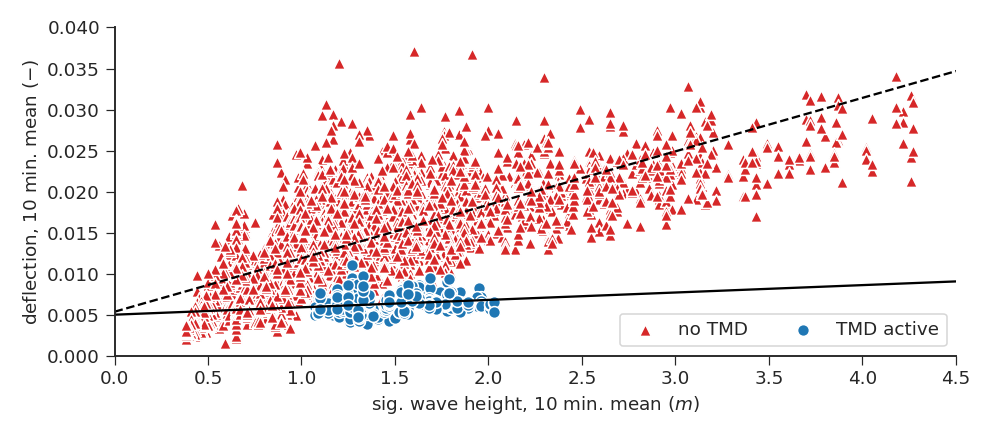

In [29]:
plt.figure(figsize=(9,4))

'''
for bw in turbines:
    if bw in ('BW67',): continue
    l = plt.scatter(turbines[bw].Hs.resample('30min').mean(),
                turbines[bw].deflection.resample('30min').mean()/6,
                color='',
                s=60,
                edgecolor='tab:blue'
               )
    
for bw in turbines_tmd:
    plt.scatter(turbines_tmd[bw].Hs.resample('10min').mean(),
                turbines_tmd[bw].deflection.resample('10min').mean()/6,
                color='tab:blue',
                edgecolor='k',
                s=60,
               )
               
lelem = [Line2D([0], [0], marker='o', color='tab:blue', label='no TMD', markerfacecolor='w', markersize=8, ls=''),
         Line2D([0], [0], marker='o', color='k', label='TMD active', markerfacecolor='tab:blue', markersize=8, ls=''),
         
        ]
plt.legend(handles=lelem)

'''

plt.scatter(df10.Hs10,
            df10.d10,
            color='tab:red',
            s=60,
            edgecolor='white',
            label='no TMD',
            marker='^',
           )

plt.scatter(BW20[BW20_start:tmd_on].Hs.resample('10min').mean(),
            BW20[BW20_start:tmd_on].deflection.resample('10min').mean()/6,
            color='tab:red',
            s=60,
            edgecolor='white',
            marker='^',
            
           )

plt.scatter(df10_tmd.Hs10,
            df10_tmd.d10,
            color='tab:blue',
            s=60,
            edgecolor='white',
            label='TMD active',
            marker='o',
           )

plt.plot([x for x in range(0, 6)],
         [(waveCorr.intercept + waveCorr.slope*x) for x in range(0, 6)],
         #label='$d_{10}(H_{S})$'+'$ = {:1.3f} + {:1.3f} H_S, ~r^2 = {:1.2f}$'.format(waveCorr.intercept,
         #                                                                            waveCorr.slope, 
         #                                                                            waveCorr.r_value),
         color='k',
         ls='--'
        )

plt.plot([x for x in range(0, 6)],
         [(waveCorr_tmd.intercept + waveCorr_tmd.slope*x) for x in range(0, 6)],
         #label='$d_{10}(H_{S})$'+'$ = {:1.3f} + {:1.3f} H_S, ~r^2 = {:1.2f}$'.format(waveCorr_tmd.intercept,
         #                                                                            waveCorr_tmd.slope, 
         #                                                                            waveCorr_tmd.r_value),
         color='k',
        )

plt.legend(ncol=2, loc='lower right', frameon=True, fancybox=True)


plt.ylim([0,0.04])
plt.xlim([0,4.5])
plt.xlabel('sig. wave height, 10 min. mean $(m)$')
plt.ylabel('deflection, 10 min. mean $(-)$')
plt.tight_layout()
plt.savefig('FIG4_d10_Hs10.png')

<IPython.core.display.Javascript object>


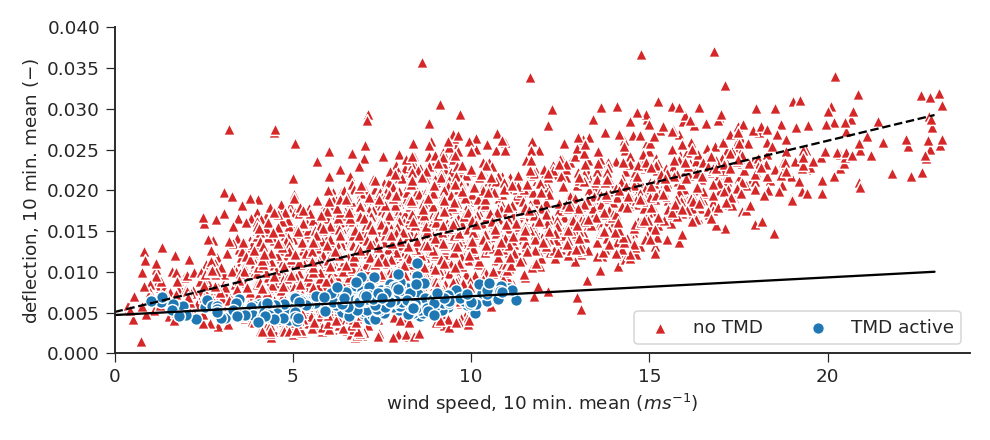

In [32]:
plt.figure(figsize=(9,4))

'''
for bw in turbines:
    if bw in ('BW67',): continue
    l = plt.scatter(turbines[bw].Hs.resample('30min').mean(),
                turbines[bw].deflection.resample('30min').mean()/6,
                color='',
                s=60,
                edgecolor='tab:blue'
               )
    
for bw in turbines_tmd:
    plt.scatter(turbines_tmd[bw].Hs.resample('10min').mean(),
                turbines_tmd[bw].deflection.resample('10min').mean()/6,
                color='tab:blue',
                edgecolor='k',
                s=60,
               )
               
lelem = [Line2D([0], [0], marker='o', color='tab:blue', label='no TMD', markerfacecolor='w', markersize=8, ls=''),
         Line2D([0], [0], marker='o', color='k', label='TMD active', markerfacecolor='tab:blue', markersize=8, ls=''),
         
        ]
plt.legend(handles=lelem)

'''

plt.scatter(df10.U10,
            df10.d10,
            color='tab:red',
            s=60,
            edgecolor='white',
            label='no TMD',
            marker='^',
           )


plt.scatter(BW20[BW20_start:tmd_on].wind_speed.resample('10min').mean(),
            BW20[BW20_start:tmd_on].deflection.resample('10min').mean()/6,
            color='tab:red',
            s=60,
            edgecolor='white',
            marker='^',
            
           )

plt.scatter(df10_tmd.U10,
            df10_tmd.d10,
            color='tab:blue',
            s=60,
            edgecolor='white',
            label='TMD active'
           )

plt.plot([x for x in range(0, 24)],
         [(windCorr.intercept + windCorr.slope*x) for x in range(0, 24)],
         #label='$d_{10}(H_{S})$'+'$ = {:1.3f} + {:1.3f} H_S, ~r^2 = {:1.2f}$'.format(waveCorr.intercept,
         #                                                                            waveCorr.slope, 
         #                                                                            waveCorr.r_value),
         color='k',
         ls='--'
        )

plt.plot([x for x in range(0, 24)],
         [(windCorr_tmd.intercept + windCorr_tmd.slope*x) for x in range(0, 24)],
         #label='$d_{10}(H_{S})$'+'$ = {:1.3f} + {:1.3f} H_S, ~r^2 = {:1.2f}$'.format(waveCorr_tmd.intercept,
         #                                                                            waveCorr_tmd.slope, 
         #                                                                            waveCorr_tmd.r_value),
         color='k',
        )

plt.legend(ncol=2, loc='lower right', frameon=True, fancybox=True)


plt.ylim([0,0.04])
plt.xlim([0,24])
plt.xlabel('wind speed, 10 min. mean $(m s^{-1})$')
plt.ylabel('deflection, 10 min. mean $(-)$')
plt.tight_layout()
plt.savefig('FIG4_d10_U10.png')

<IPython.core.display.Javascript object>


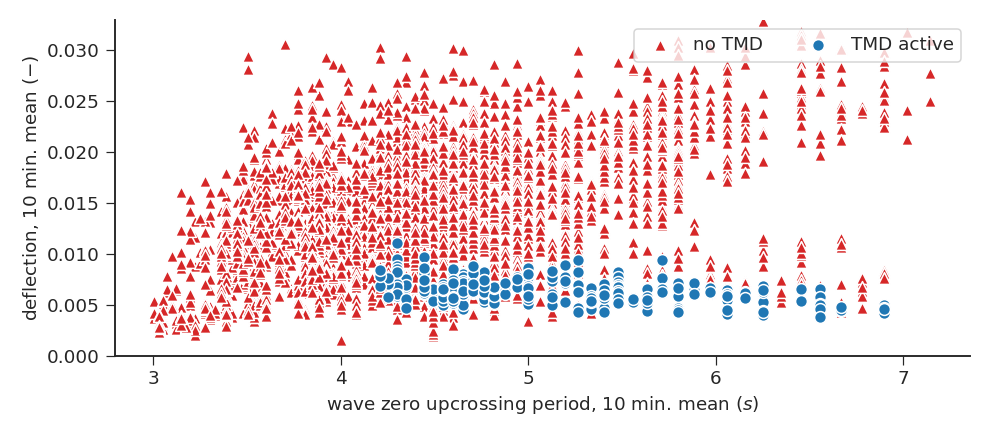

In [30]:
plt.figure(figsize=(9,4))

'''
for bw in turbines:
    if bw in ('BW67',): continue
    l = plt.scatter(turbines[bw].Hs.resample('30min').mean(),
                turbines[bw].deflection.resample('30min').mean()/6,
                color='',
                s=60,
                edgecolor='tab:blue'
               )
    
for bw in turbines_tmd:
    plt.scatter(turbines_tmd[bw].Hs.resample('10min').mean(),
                turbines_tmd[bw].deflection.resample('10min').mean()/6,
                color='tab:blue',
                edgecolor='k',
                s=60,
               )
               
lelem = [Line2D([0], [0], marker='o', color='tab:blue', label='no TMD', markerfacecolor='w', markersize=8, ls=''),
         Line2D([0], [0], marker='o', color='k', label='TMD active', markerfacecolor='tab:blue', markersize=8, ls=''),
         
        ]
plt.legend(handles=lelem)

'''

plt.scatter(df10.Tp10/1.28,
            df10.d10,
            color='tab:red',
            s=60,
            edgecolor='white',
            label='no TMD',
            marker='^',
           )


plt.scatter(BW20[BW20_start:tmd_on].Tz.resample('10min').mean(),
            BW20[BW20_start:tmd_on].deflection.resample('10min').mean()/6,
            color='tab:red',
            s=60,
            edgecolor='white',
            marker='^',
           )

plt.scatter(df10_tmd.Tp10/1.28,
            df10_tmd.d10,
            color='tab:blue',
            s=60,
            edgecolor='white',
            label='TMD active',
            marker='o'
           )


plt.legend(ncol=2, loc='upper right', frameon=True, fancybox=True)


plt.ylim([0,0.033])
#plt.xlim([0,20])
plt.xlabel('wave zero upcrossing period, 10 min. mean $(s)$')
plt.ylabel('deflection, 10 min. mean $(-)$')
plt.tight_layout()
plt.savefig('FIG4_d10_Tz10.png')

<IPython.core.display.Javascript object>


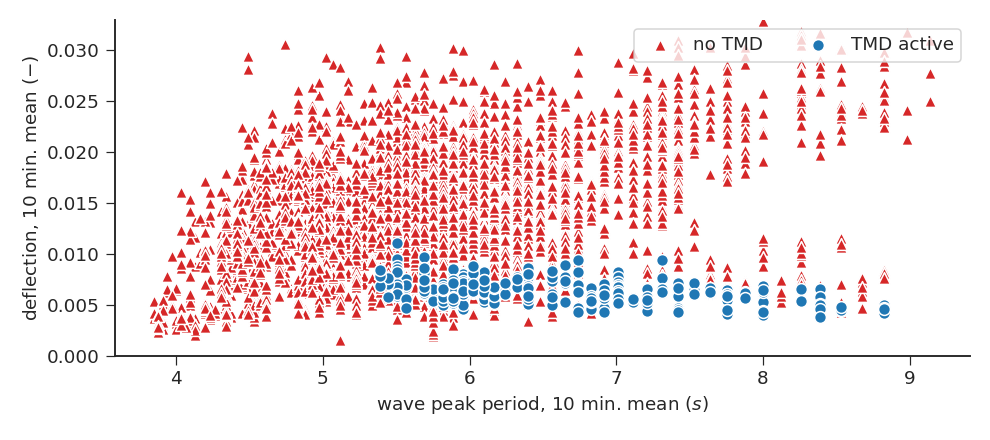

In [31]:
plt.figure(figsize=(9,4))

'''
for bw in turbines:
    if bw in ('BW67',): continue
    l = plt.scatter(turbines[bw].Hs.resample('30min').mean(),
                turbines[bw].deflection.resample('30min').mean()/6,
                color='',
                s=60,
                edgecolor='tab:blue'
               )
    
for bw in turbines_tmd:
    plt.scatter(turbines_tmd[bw].Hs.resample('10min').mean(),
                turbines_tmd[bw].deflection.resample('10min').mean()/6,
                color='tab:blue',
                edgecolor='k',
                s=60,
               )
               
lelem = [Line2D([0], [0], marker='o', color='tab:blue', label='no TMD', markerfacecolor='w', markersize=8, ls=''),
         Line2D([0], [0], marker='o', color='k', label='TMD active', markerfacecolor='tab:blue', markersize=8, ls=''),
         
        ]
plt.legend(handles=lelem)

'''

plt.scatter(df10.Tp10,
            df10.d10,
            color='tab:red',
            s=60,
            edgecolor='white',
            label='no TMD',
            marker='^',
           )


plt.scatter(BW20[BW20_start:tmd_on].Tz.resample('10min').mean()*1.28,
            BW20[BW20_start:tmd_on].deflection.resample('10min').mean()/6,
            color='tab:red',
            s=60,
            edgecolor='white',
            marker='^',
           )

plt.scatter(df10_tmd.Tp10,
            df10_tmd.d10,
            color='tab:blue',
            s=60,
            edgecolor='white',
            label='TMD active',
            marker='o'
           )


plt.legend(ncol=2, loc='upper right', frameon=True, fancybox=True)


plt.ylim([0,0.033])
#plt.xlim([0,20])
plt.xlabel('wave peak period, 10 min. mean $(s)$')
plt.ylabel('deflection, 10 min. mean $(-)$')
plt.tight_layout()
plt.savefig('FIG4_d10_Tp10.png')

## Spectrogram of the TNH

<IPython.core.display.Javascript object>


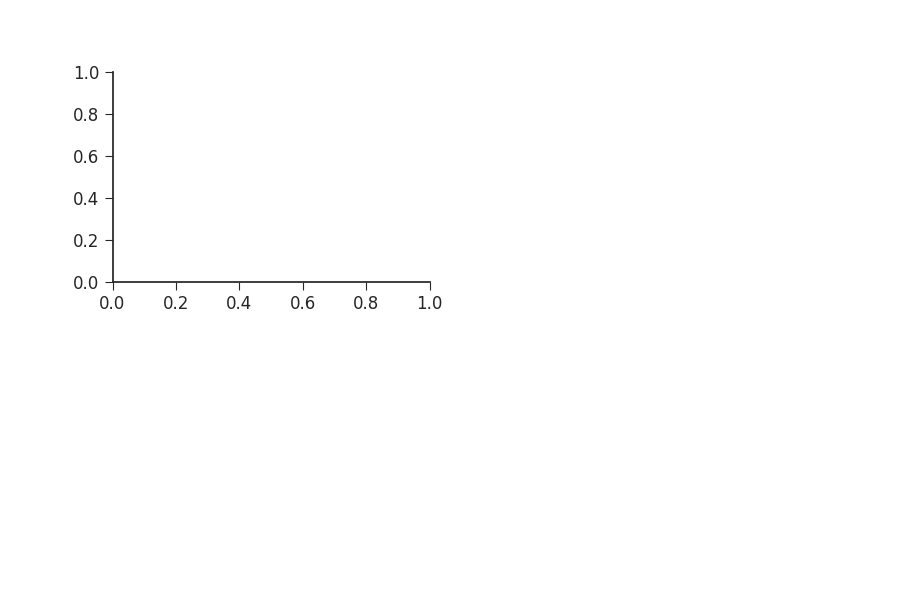

NameError: name 'acc' is not defined

In [20]:
plt.figure(figsize=(9,6))
ax1 = plt.subplot(221)
ax1.plot(acc[:,0], acc[:,1])
ax1.set_ylabel('Acceleration $(g)$ \n F-A')
ax1.axvspan(7.5, 21.5, facecolor='white', edgecolor='k', hatch='/')
ax1.set_ylim([-0.1, 0.1])
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(222, sharey=ax1)
ax2.plot(acc[:,0], acc[:,2], color='tab:red')
ax2.set_ylabel('S-S')
ax2.axvspan(7.5, 21.5, facecolor='white', edgecolor='k', hatch='/')
ax2.set_ylim([-0.1, 0.1])
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = plt.subplot(223, sharex=ax1)
ax3.pcolormesh(time, freq, specX, cmap='Blues')
ax3.set_ylim([0,0.4])
ax3.set_xlim([0, 23])
ax3.set_ylabel('frequency $(s^{-1})$ \n F-A')
ax3.set_xlabel('time $(h)$')

ax4 = plt.subplot(224, sharex=ax2, sharey=ax3)
ax4.pcolormesh(time, freq, specX, cmap='Reds')
ax4.set_ylim([0,0.4])
ax4.set_xlim([0, 23])
ax4.set_ylabel('S-S')
ax4.set_xlabel('time $(h)$')
plt.setp(ax4.get_yticklabels(), visible=False)

plt.tight_layout()
plt.savefig('FIG6_Spectogram.png', dpi=150)


### wind wave missalignement

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


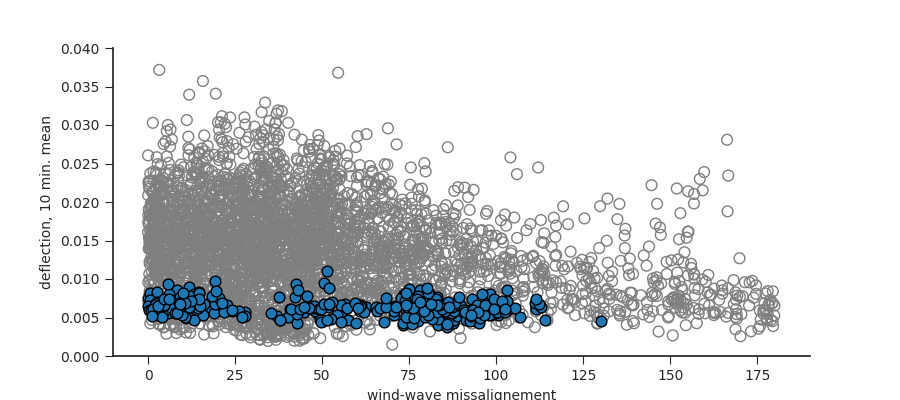

No handles with labels found to put in legend.


In [78]:
def heading(x):
    if x < 0:
        x = x*-1
    if x > 180:
        return x-180
    else:
        return x


plt.figure(figsize=(9,4))


for t in turbines:
    #if t in ('BW59',): continue
    beta = turbines[t].wave_dir.resample('10min').mean() - turbines[t].wind_dir_corr.resample('10min').mean()
    beta = beta.apply(heading)

    plt.scatter(beta,
                turbines[t].deflection.resample('10min').mean()/6,
                color='',
                s=60,
                edgecolor='tab:gray'
               )
    
for t in turbines_tmd:
    #if t in ('BW59',): continue
    beta = turbines_tmd[t].wave_dir.resample('10min').mean() - turbines_tmd[t].wind_dir_corr.resample('10min').mean()
    beta = beta.apply(heading)

    plt.scatter(beta,
                turbines_tmd[t].deflection.resample('10min').mean()/6,
                color='tab:blue',
                s=60,
                edgecolor='k'
               )
plt.ylim([0, 0.04])
plt.legend(ncol=2)
plt.xlabel('wind-wave missalignement')
plt.ylabel('deflection, 10 min. mean')
plt.savefig('FIG5_wind_wave_missalignement.png')

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


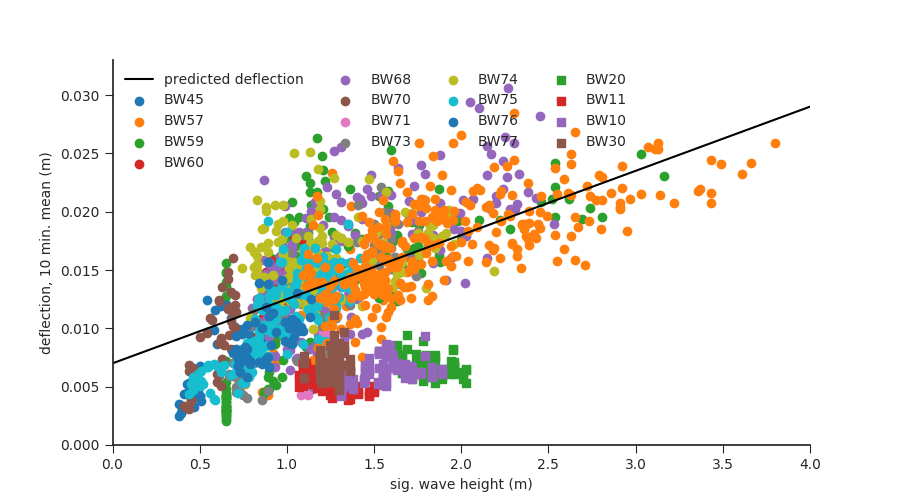

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


In [22]:
font = {'family' : "Times New Roman",
        'size'   : 10}
plt.rc('font', **font)

plt.figure(figsize=(9,5))

for bw in turbines:
    if bw in ('BW67',): continue
    l = plt.scatter(turbines[bw].Hs.resample('30min').mean(),
                    turbines[bw].deflection.resample('30min').mean()/6,
                    label=bw,
                    #color='',
                    #s=60,
                    #edgecolor='grey'
                   )
    
for bw in turbines_tmd:
    plt.scatter(turbines_tmd[bw].Hs.resample('10min').mean(),
                turbines_tmd[bw].deflection.resample('10min').mean()/6,
                label=bw,
                marker='s'
                #color='tab:blue',
               )
    
plt.plot([x for x in range(6)],
         [(0.042 + 0.033*x)/6 for x in range(6)],
         label='predicted deflection',
         color='k'
        )

plt.legend(ncol=4)

#lelem = [Line2D([0], [0], marker='o', color='grey', label='turbines w/a TMD', markerfacecolor='w', markersize=8, ls=''),
#         Line2D([0], [0], marker='o', color='tab:blue', label='turbines TMD', markersize=8, ls='')
#        ]
#plt.legend(handles=lelem)

plt.ylim([0,0.033])
plt.xlim([0,4])
plt.xlabel('sig. wave height (m)')
plt.ylabel('deflection, 10 min. mean (m)')
plt.savefig('damper_deflection.png')

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


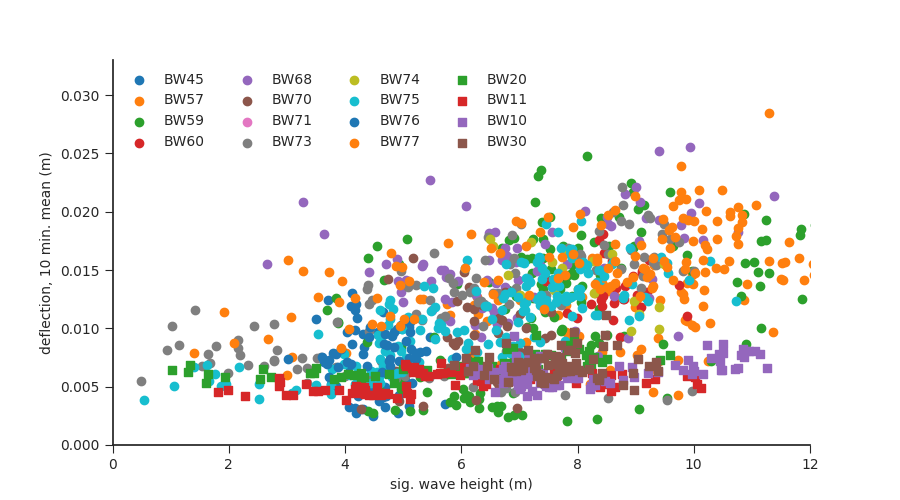

In [23]:
font = {'family' : "Times New Roman",
        'size'   : 10}
plt.rc('font', **font)

plt.figure(figsize=(9,5))

for bw in turbines:
    if bw in ('BW67',): continue
    l = plt.scatter(turbines[bw].wind_speed.resample('30min').mean(),
                    turbines[bw].deflection.resample('30min').mean()/6,
                    label=bw,
                    #color='',
                    #s=60,
                    #edgecolor='grey'
                   )
    
for bw in turbines_tmd:
    plt.scatter(turbines_tmd[bw].wind_speed.resample('10min').mean(),
                turbines_tmd[bw].deflection.resample('10min').mean()/6,
                label=bw,
                marker='s'
                #color='tab:blue',
               )


plt.legend(ncol=4)

#lelem = [Line2D([0], [0], marker='o', color='grey', label='turbines w/a TMD', markerfacecolor='w', markersize=8, ls=''),
#         Line2D([0], [0], marker='o', color='tab:blue', label='turbines TMD', markersize=8, ls='')
#        ]
#plt.legend(handles=lelem)

plt.ylim([0,0.033])
plt.xlim([0,12])
plt.xlabel('sig. wave height (m)')
plt.ylabel('deflection, 10 min. mean (m)')
plt.savefig('damper_deflection.png')

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


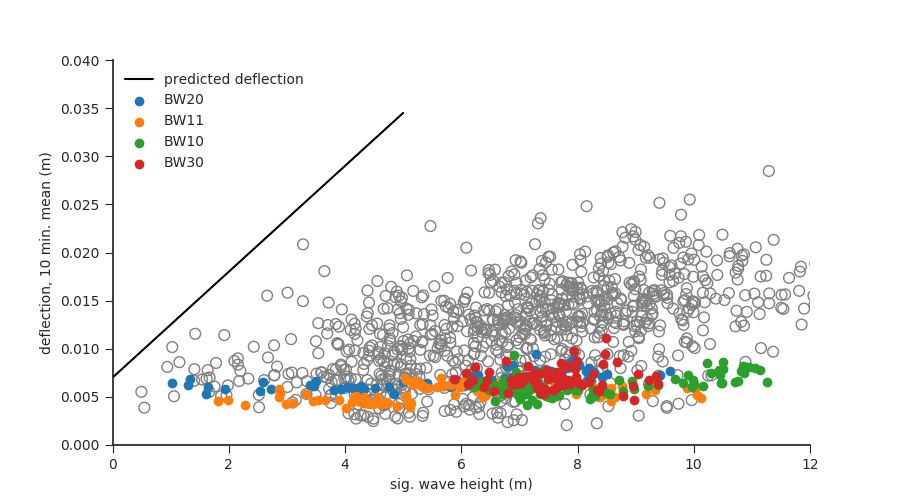

Text(0, 0.5, 'deflection, 10 min. mean (m)')

In [24]:
plt.figure(figsize=(9,5))

for bw in turbines:
    if bw in ('BW67',): continue
    plt.scatter(turbines[bw].wind_speed.resample('30min').mean(),
                turbines[bw].deflection.resample('30min').mean()/6,
                color='',
                s=60,
                edgecolor='grey'
               )
    
for bw in turbines_tmd:
    plt.scatter(turbines_tmd[bw].wind_speed.resample('10min').mean(),
                turbines_tmd[bw].deflection.resample('10min').mean()/6,
                #color='steelblue',
                label=bw,
               )
    
plt.plot([x for x in range(6)],
         [(0.042 + 0.033*x)/6 for x in range(6)],
         label='predicted deflection',
         color='k'
        )




"""
legend_elements = [Line2D([0], [0], color='b', lw=4, label='Line'),
                   Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='g', markersize=15),
                   Patch(facecolor='orange', edgecolor='r',
                         label='Color Patch')]

# Create the figure

ax.legend(handles=legend_elements, loc='center')

plt.show()
"""

plt.ylim([0,0.04])
plt.xlim([0,12])
plt.legend()
plt.xlabel('sig. wave height (m)')
plt.ylabel('deflection, 10 min. mean (m)')


In [25]:
turbines['BW67'].columns

Index(['pos_x', 'pos_y', 'deflection_gradient', 'pos_z', 'deflection',
       'wind_speed', 'wind_dir', 'wind_dir_corr', 'Hs', 'wave_dir',
       'wave_spread', 'Tz', 'Tp'],
      dtype='object')

---

## Results
### d10 vs Hs

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


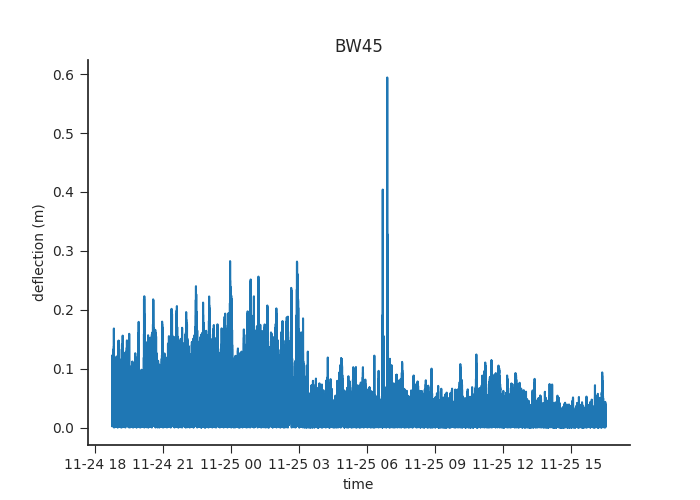

<IPython.core.display.Javascript object>


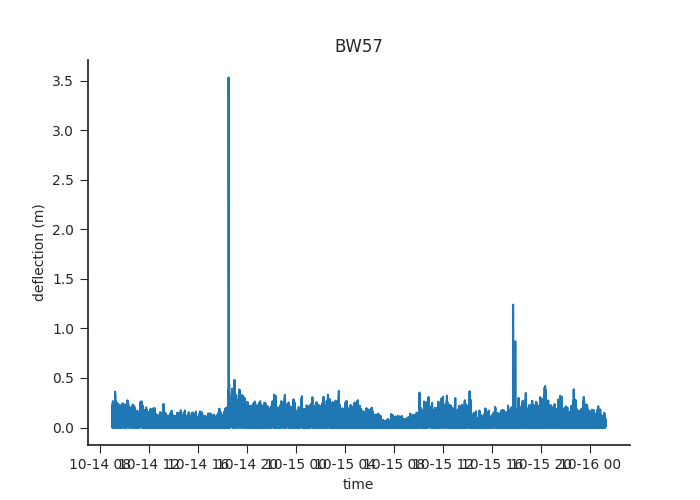

<IPython.core.display.Javascript object>


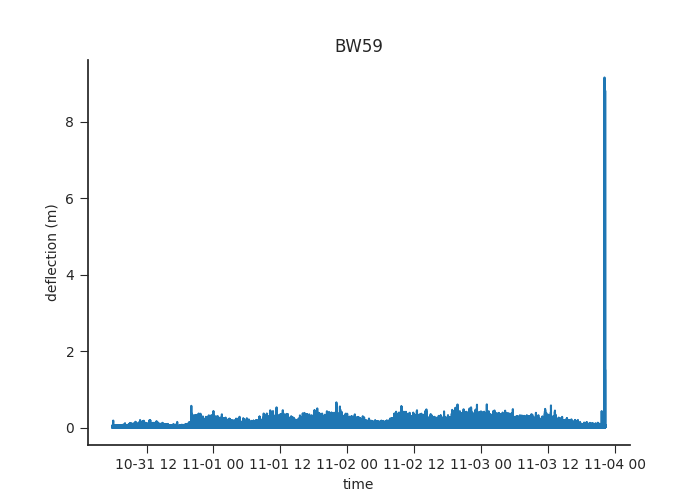

<IPython.core.display.Javascript object>


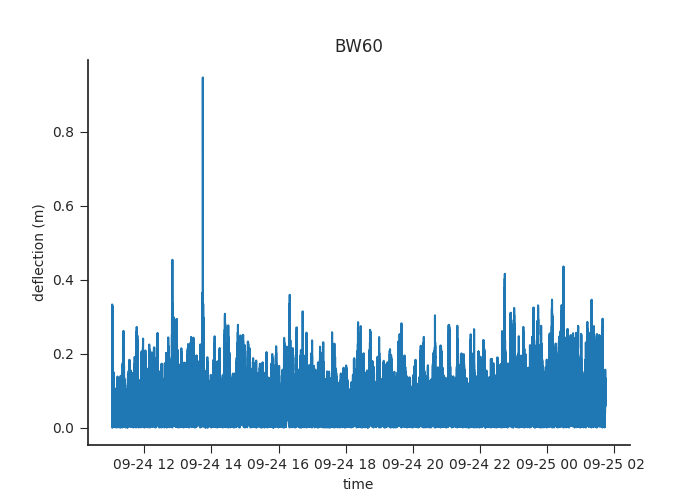

<IPython.core.display.Javascript object>


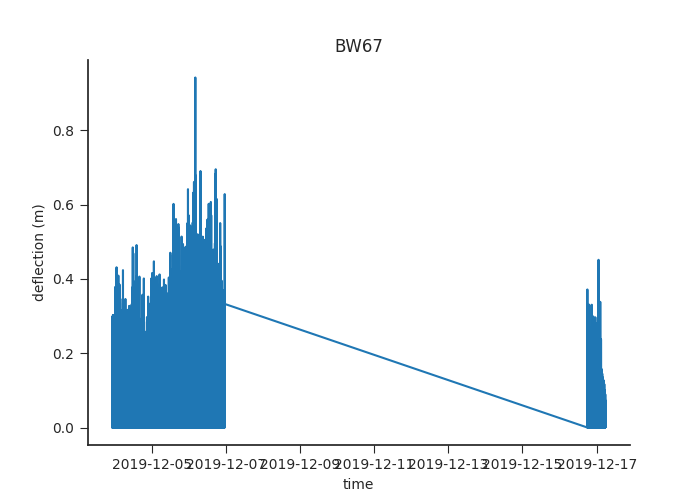

<IPython.core.display.Javascript object>


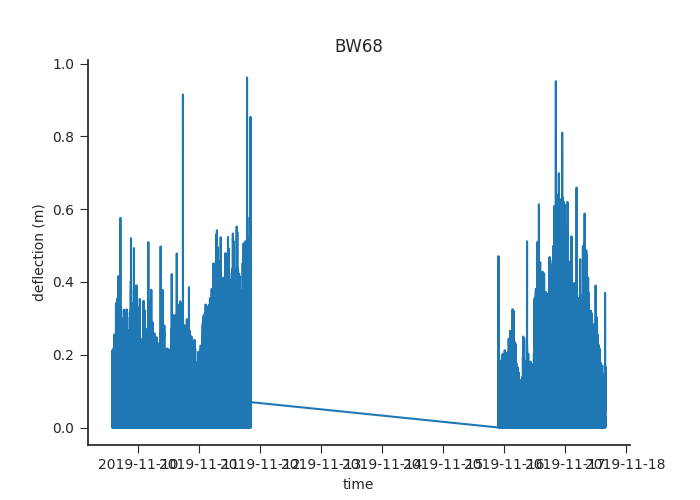

<IPython.core.display.Javascript object>


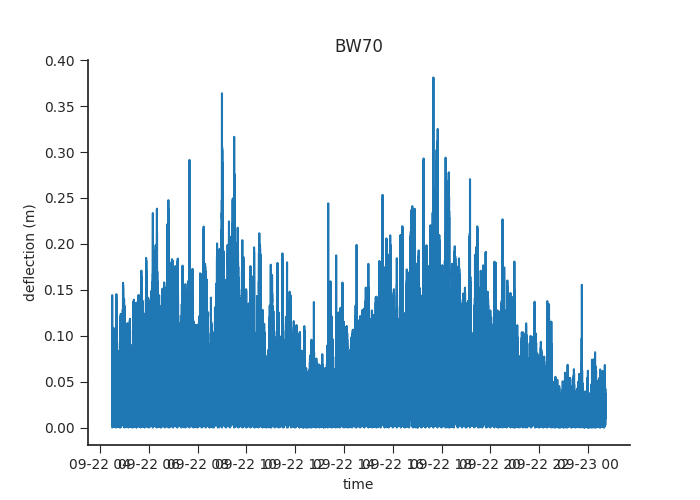

<IPython.core.display.Javascript object>


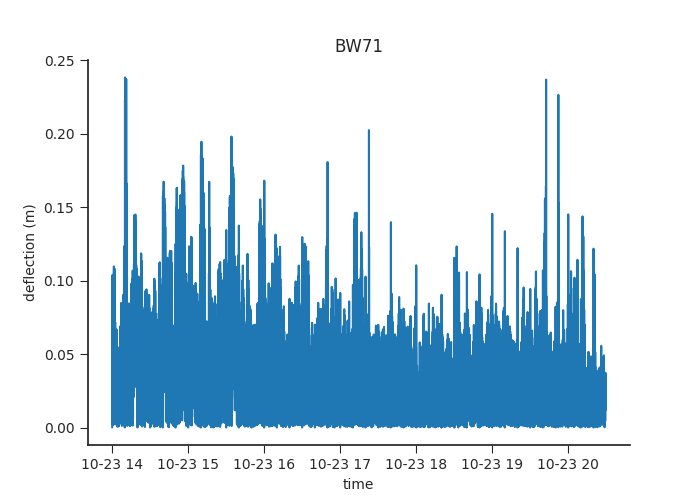

<IPython.core.display.Javascript object>


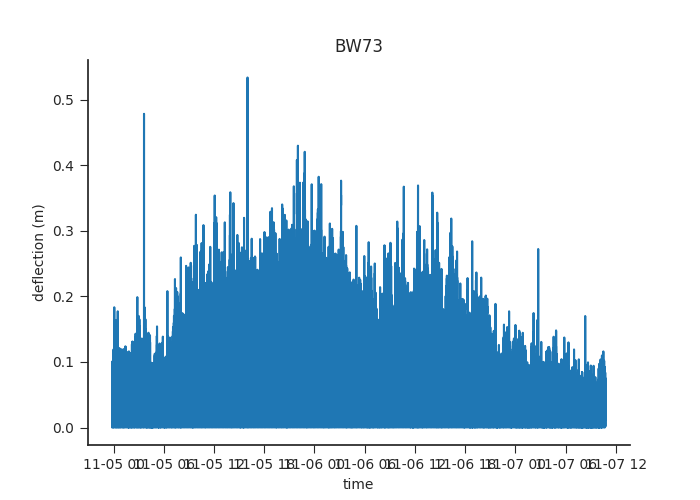

<IPython.core.display.Javascript object>


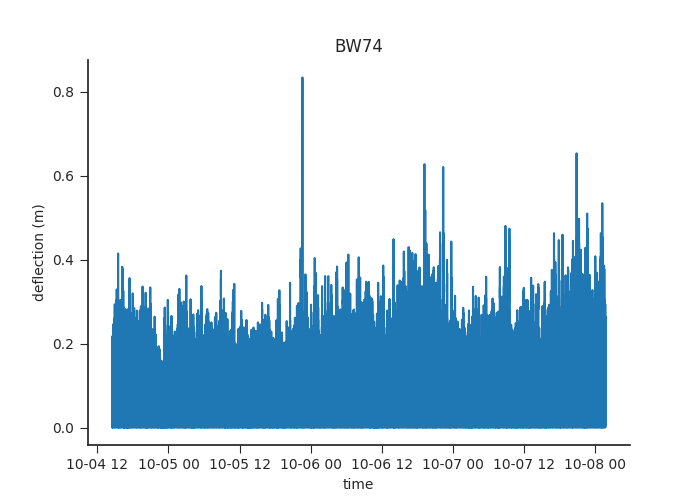

<IPython.core.display.Javascript object>


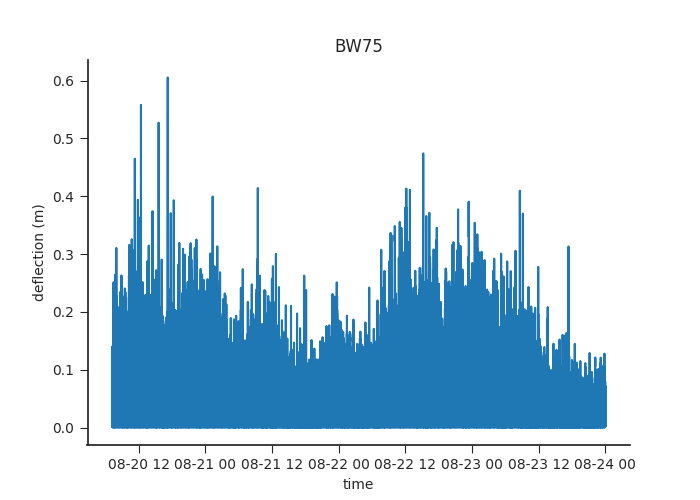

<IPython.core.display.Javascript object>


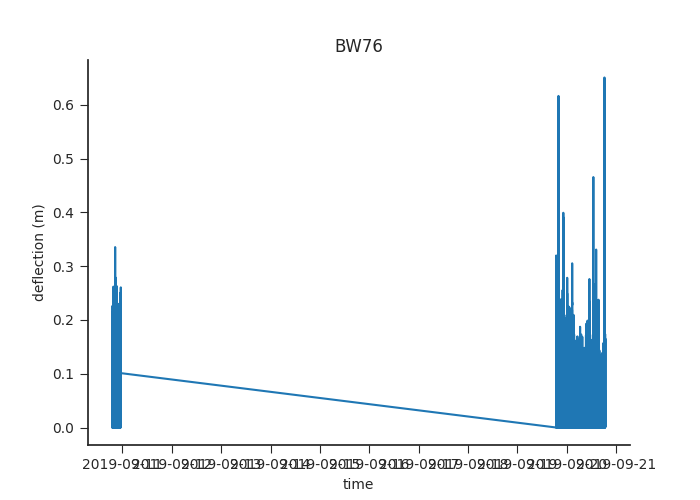

<IPython.core.display.Javascript object>


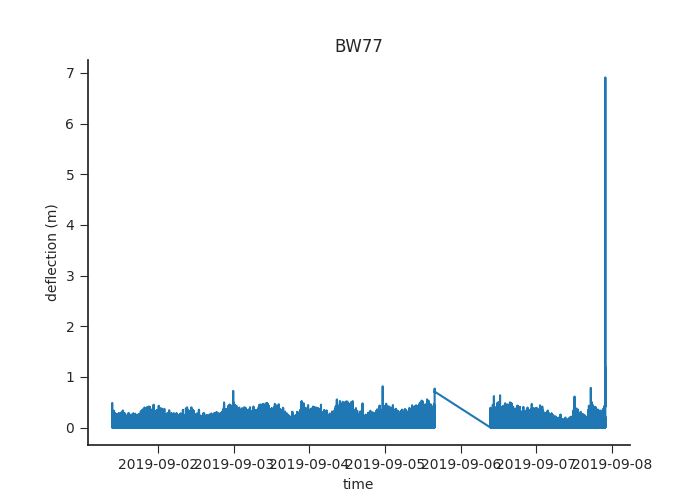

In [26]:
for t in turbines:
    plt.figure(figsize=(7,5))
    plt.plot(turbines[t].deflection)
    plt.title(t)
    plt.xlabel('time')
    plt.ylabel('deflection (m)')

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


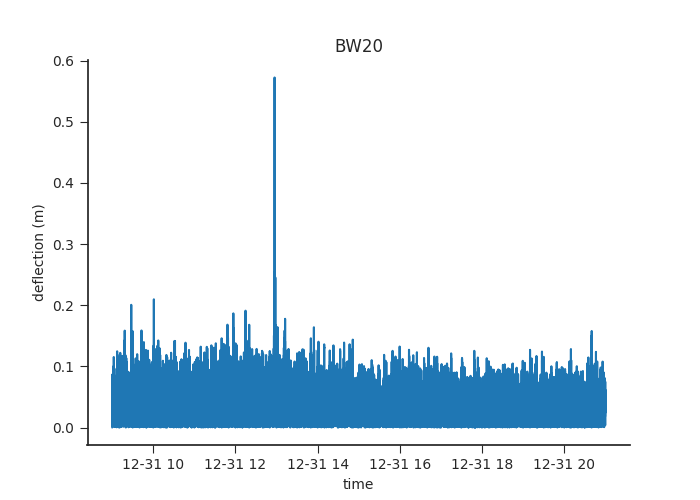

<IPython.core.display.Javascript object>


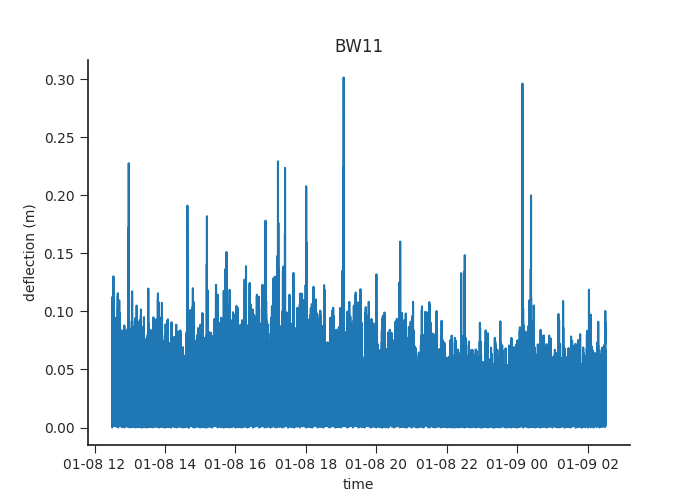

<IPython.core.display.Javascript object>


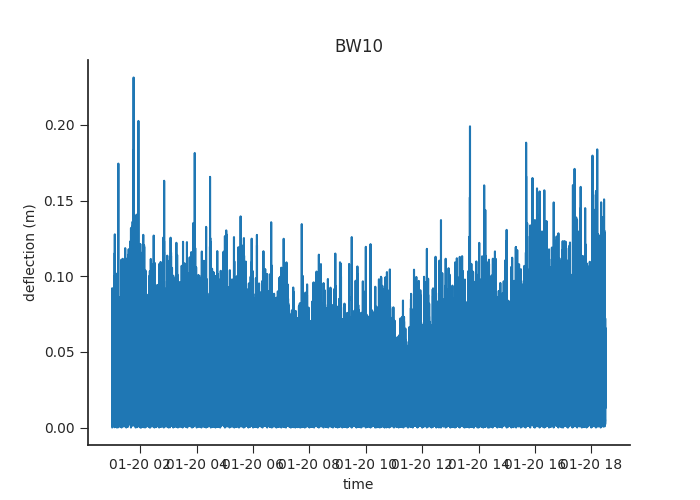

<IPython.core.display.Javascript object>


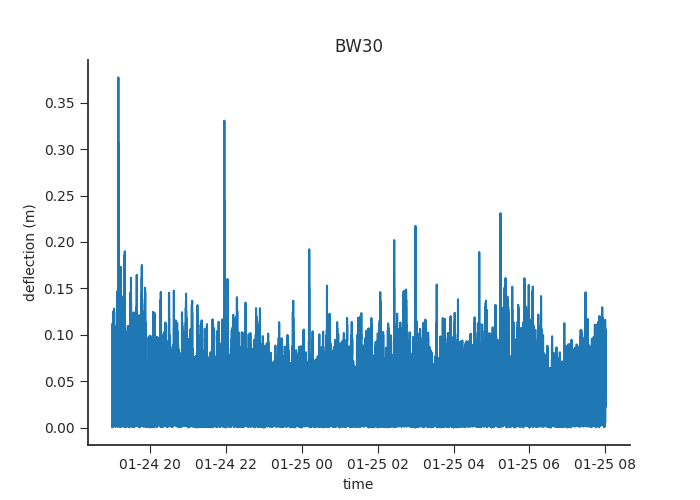

In [27]:
for t in turbines_tmd:
    plt.figure(figsize=(7,5))
    plt.plot(turbines_tmd[t].deflection)
    plt.title(t)
    plt.xlabel('time')
    plt.ylabel('deflection (m)')

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


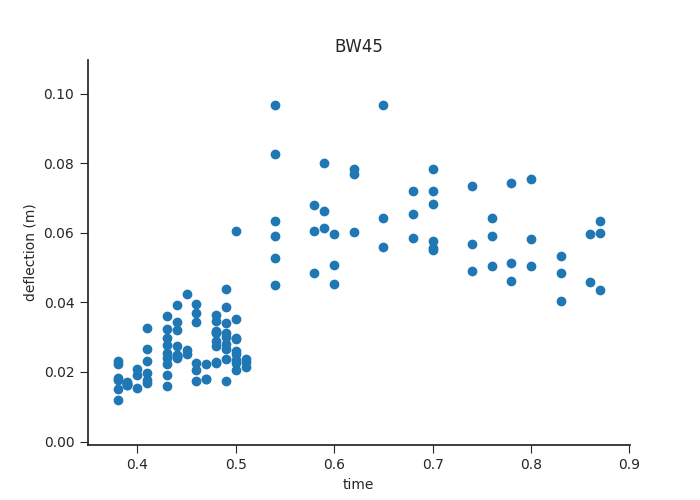

<IPython.core.display.Javascript object>


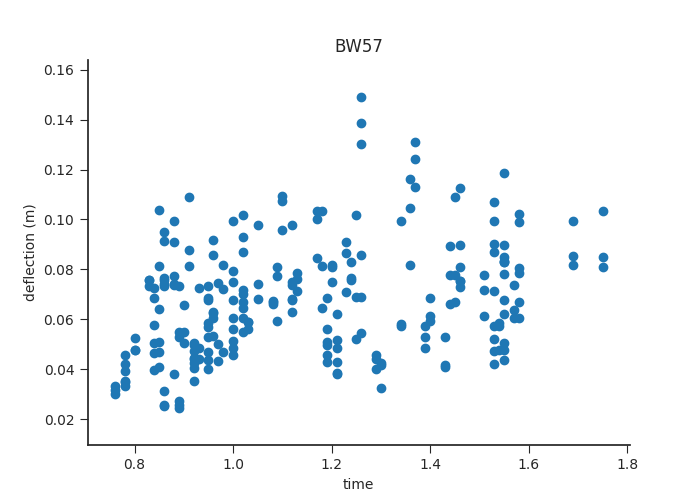

<IPython.core.display.Javascript object>


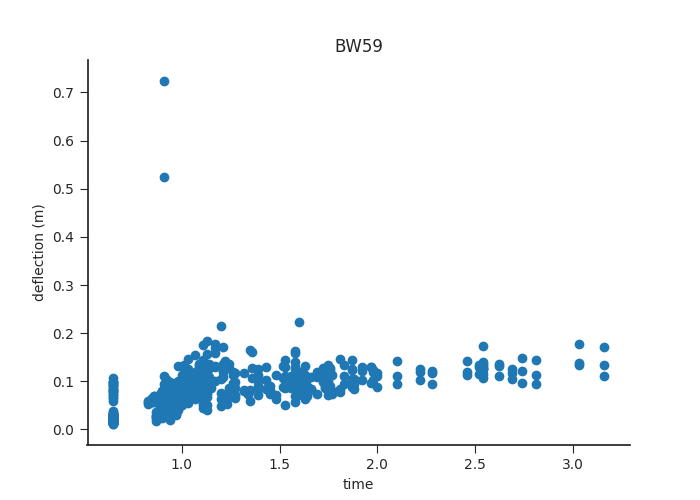

<IPython.core.display.Javascript object>


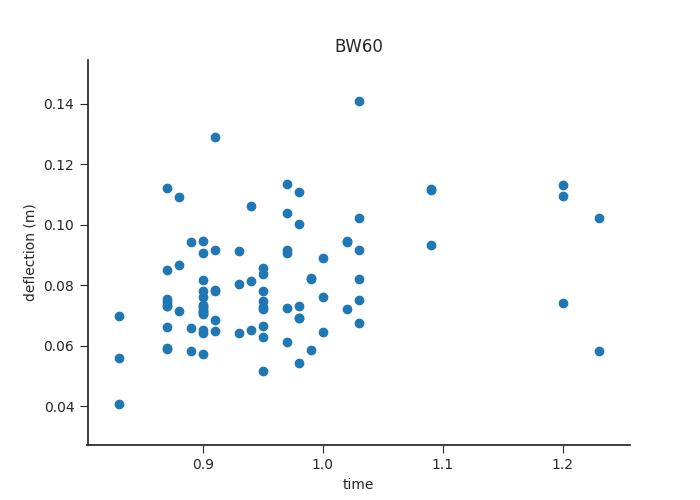

<IPython.core.display.Javascript object>


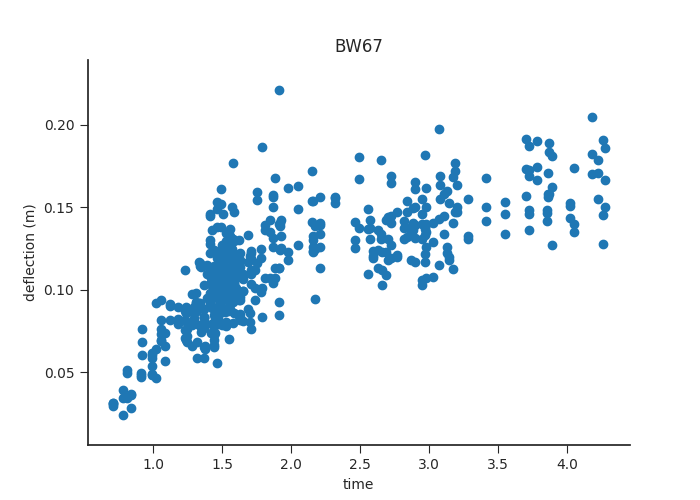

<IPython.core.display.Javascript object>


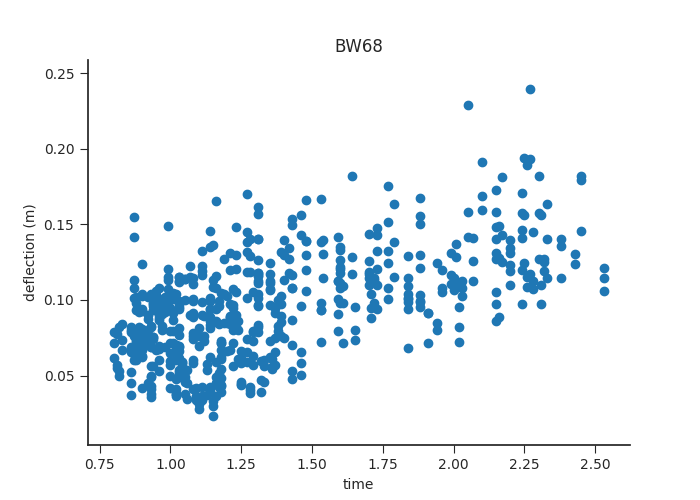

<IPython.core.display.Javascript object>


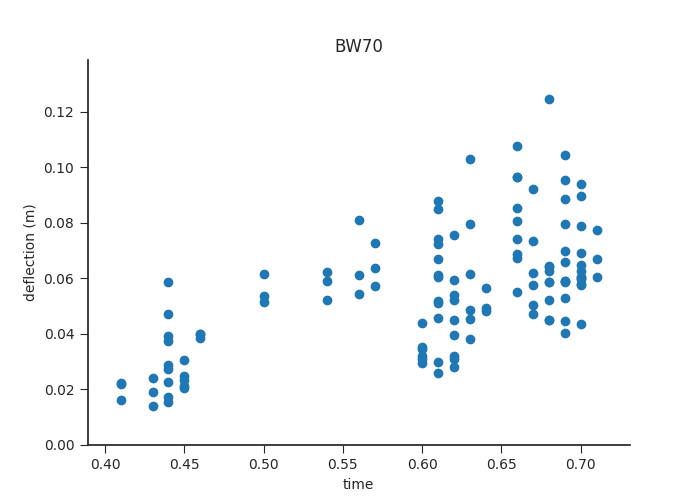

<IPython.core.display.Javascript object>


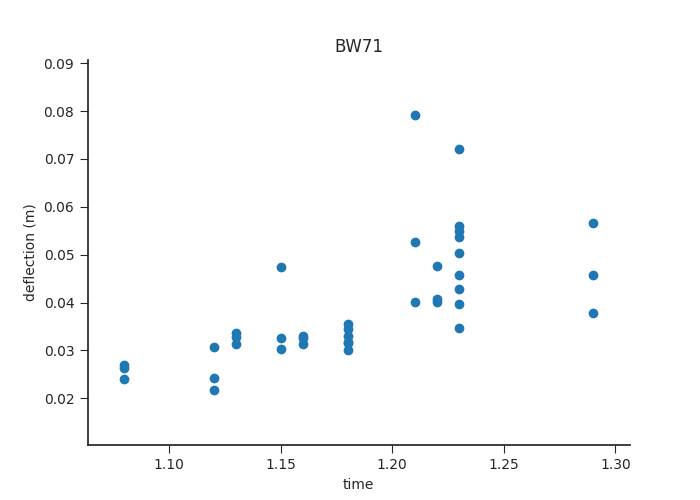

<IPython.core.display.Javascript object>


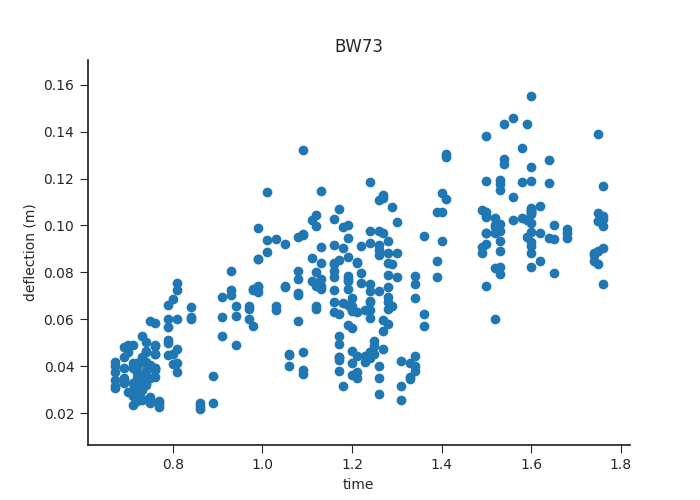

<IPython.core.display.Javascript object>


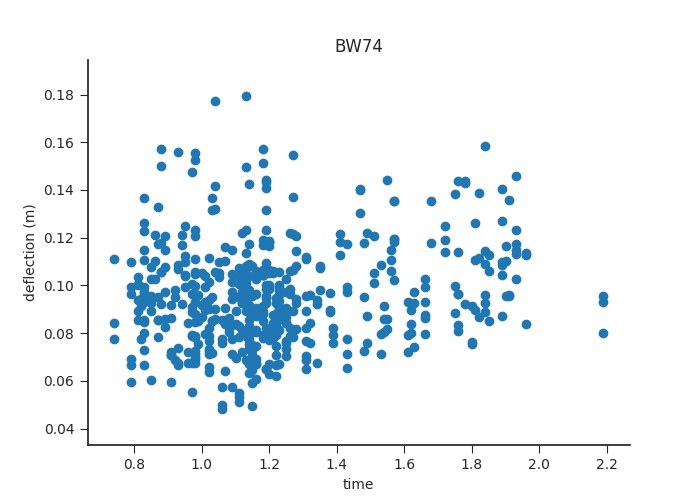

<IPython.core.display.Javascript object>


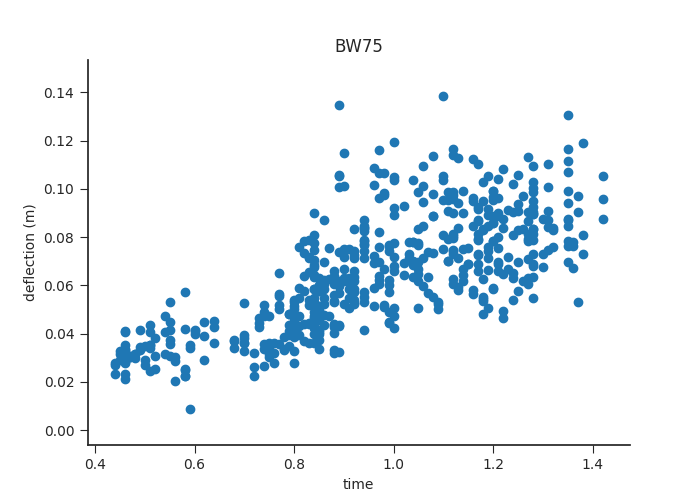

<IPython.core.display.Javascript object>


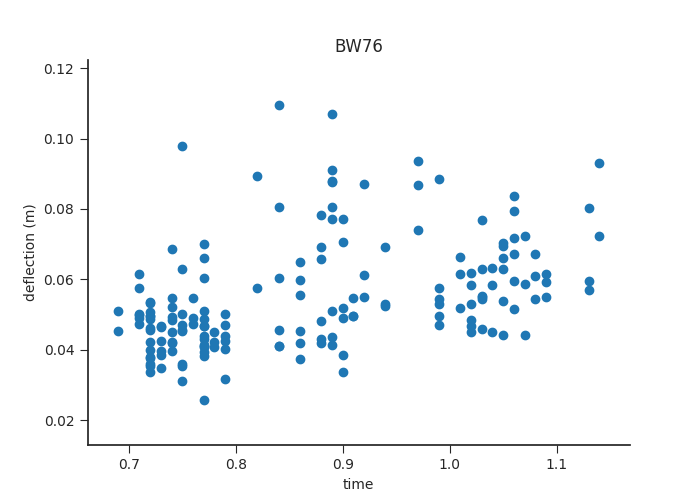

<IPython.core.display.Javascript object>


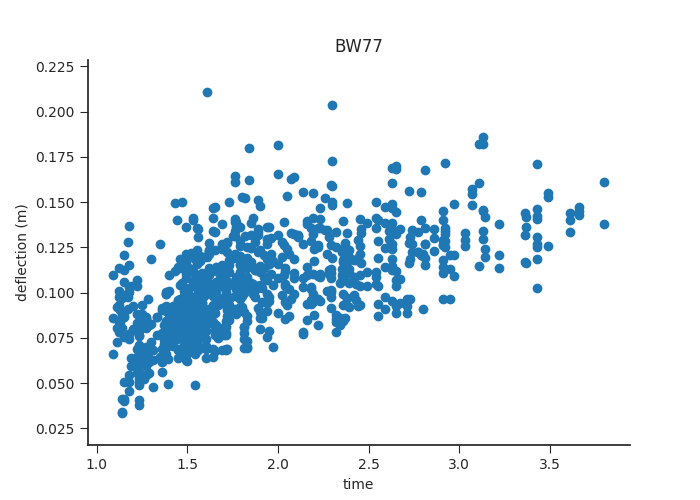

In [28]:
for t in turbines:
    plt.figure(figsize=(7,5))
    plt.scatter(turbines[t].Hs.resample('10min').mean(),
                turbines[t].deflection.resample('10min').mean(),
               )
    plt.title(t)
    plt.xlabel('time')
    plt.ylabel('deflection (m)')

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


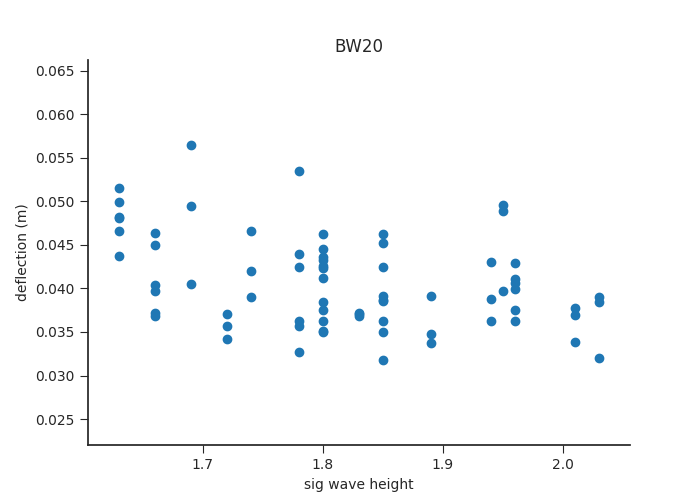

<IPython.core.display.Javascript object>


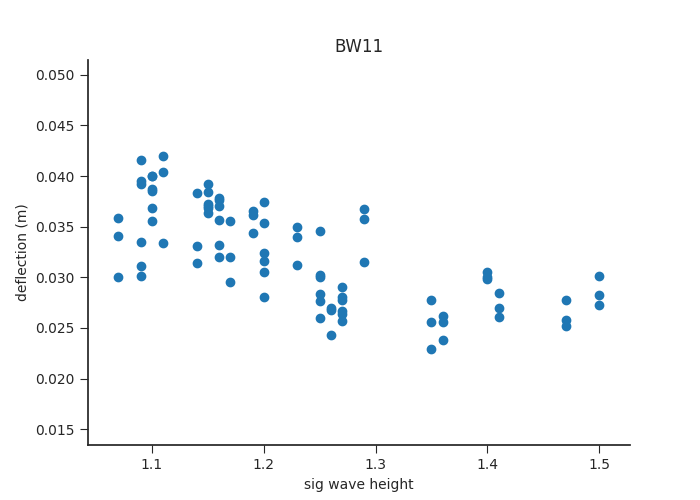

<IPython.core.display.Javascript object>


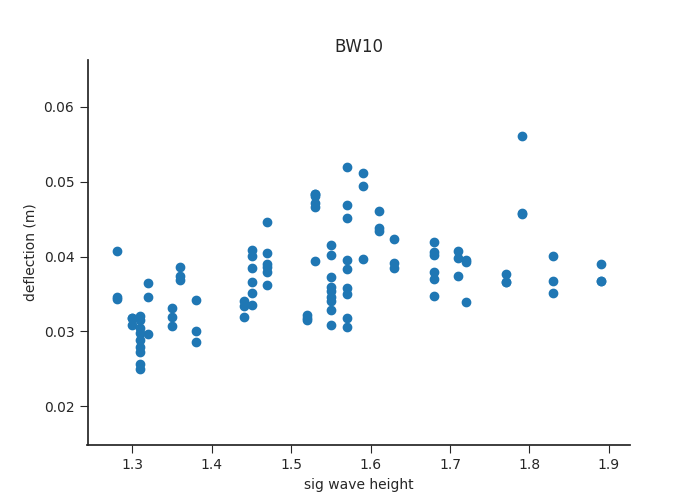

<IPython.core.display.Javascript object>


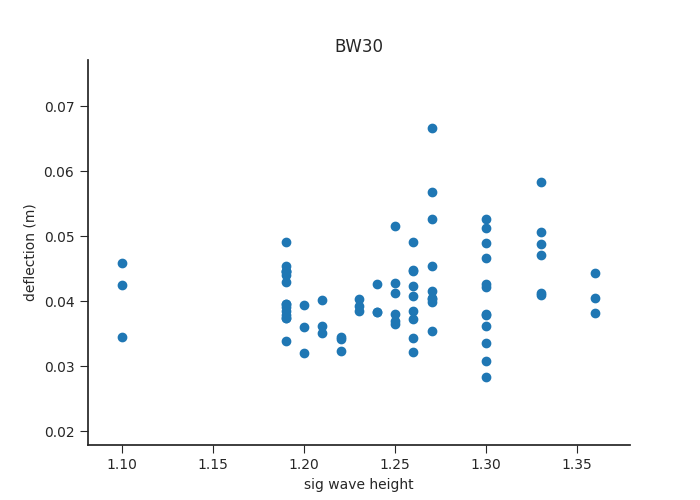

In [29]:
for t in turbines_tmd:
    plt.figure(figsize=(7,5))
    plt.scatter(turbines_tmd[t].Hs.resample('10min').mean(),
                turbines_tmd[t].deflection.resample('10min').mean(),
               )
    plt.title(t)
    plt.xlabel('sig wave height')
    plt.ylabel('deflection (m)')

## Wind-wave missalignement

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


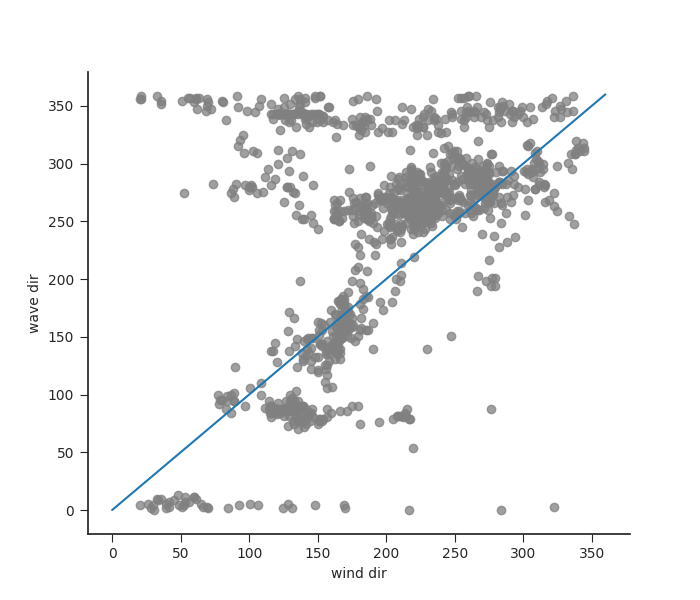

Text(0, 0.5, 'wave dir')

In [30]:
plt.figure()
for t in turbines:
    plt.scatter(turbines[t].wind_dir_corr.resample('30min').mean(),
                turbines[t].wave_dir.resample('30min').mean(),
                color='grey',
                alpha=0.75,
               )
plt.plot([0, 360], [0,360])
plt.xlabel('wind dir')
plt.ylabel('wave dir')

In [31]:
test = turbines['BW60']

beta = test.wave_dir.resample('30min').mean() - test.wind_dir_corr.resample('30min').mean()

print(beta)
b2 = beta.copy()


b2.apply(heading)
b2


2019-09-24 13:00:00+02:00      3.224148
2019-09-24 13:30:00+02:00      5.213359
2019-09-24 14:00:00+02:00     -9.500890
2019-09-24 14:30:00+02:00     -9.477615
2019-09-24 15:00:00+02:00     -8.050690
2019-09-24 15:30:00+02:00      2.704939
2019-09-24 16:00:00+02:00     -4.514862
2019-09-24 16:30:00+02:00    -17.028950
2019-09-24 17:00:00+02:00    -30.108504
2019-09-24 17:30:00+02:00    -15.904336
2019-09-24 18:00:00+02:00      4.156739
2019-09-24 18:30:00+02:00      5.820976
2019-09-24 19:00:00+02:00    111.679877
2019-09-24 19:30:00+02:00    102.113569
2019-09-24 20:00:00+02:00     12.615602
2019-09-24 20:30:00+02:00      9.128080
2019-09-24 21:00:00+02:00     92.795795
2019-09-24 21:30:00+02:00      1.245714
2019-09-24 22:00:00+02:00    -10.662589
2019-09-24 22:30:00+02:00     -9.304558
2019-09-24 23:00:00+02:00    -21.260854
2019-09-24 23:30:00+02:00     -2.975602
2019-09-25 00:00:00+02:00     -0.479594
2019-09-25 00:30:00+02:00     15.927180
2019-09-25 01:00:00+02:00      7.816121


2019-09-24 13:00:00+02:00      3.224148
2019-09-24 13:30:00+02:00      5.213359
2019-09-24 14:00:00+02:00     -9.500890
2019-09-24 14:30:00+02:00     -9.477615
2019-09-24 15:00:00+02:00     -8.050690
2019-09-24 15:30:00+02:00      2.704939
2019-09-24 16:00:00+02:00     -4.514862
2019-09-24 16:30:00+02:00    -17.028950
2019-09-24 17:00:00+02:00    -30.108504
2019-09-24 17:30:00+02:00    -15.904336
2019-09-24 18:00:00+02:00      4.156739
2019-09-24 18:30:00+02:00      5.820976
2019-09-24 19:00:00+02:00    111.679877
2019-09-24 19:30:00+02:00    102.113569
2019-09-24 20:00:00+02:00     12.615602
2019-09-24 20:30:00+02:00      9.128080
2019-09-24 21:00:00+02:00     92.795795
2019-09-24 21:30:00+02:00      1.245714
2019-09-24 22:00:00+02:00    -10.662589
2019-09-24 22:30:00+02:00     -9.304558
2019-09-24 23:00:00+02:00    -21.260854
2019-09-24 23:30:00+02:00     -2.975602
2019-09-25 00:00:00+02:00     -0.479594
2019-09-25 00:30:00+02:00     15.927180
2019-09-25 01:00:00+02:00      7.816121


/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


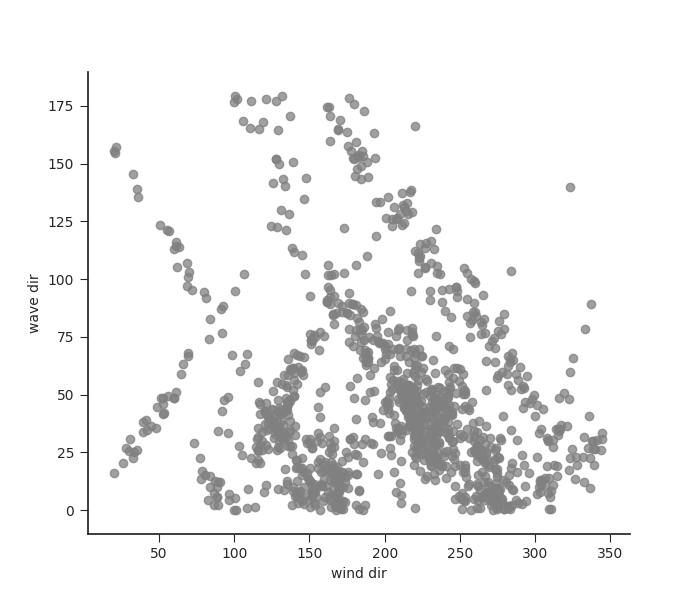

Text(0, 0.5, 'wave dir')

In [32]:

plt.figure()
for t in turbines:
    beta = turbines[t].wave_dir.resample('30min').mean() - turbines[t].wind_dir_corr.resample('30min').mean()
    beta = beta.apply(heading)


    plt.scatter(turbines[t].wind_dir_corr.resample('30min').mean(),
                beta,
                color='grey',
                alpha=0.75,
               )

plt.xlabel('wind dir')
plt.ylabel('wave dir')

/home/san/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


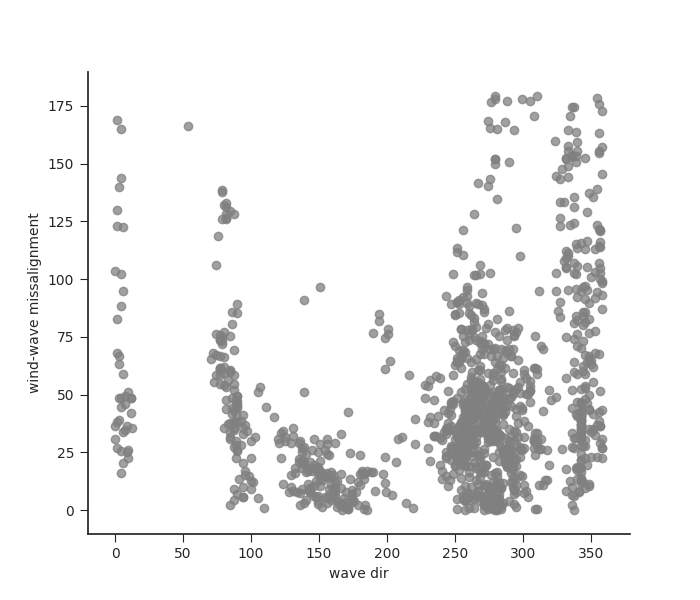

Text(0, 0.5, 'wind-wave missalignment')

In [33]:
plt.figure()
for t in turbines:
    beta = turbines[t].wave_dir.resample('30min').mean() - turbines[t].wind_dir_corr.resample('30min').mean()
    beta = beta.apply(heading)


    plt.scatter(turbines[t].wave_dir.resample('30min').mean(),
                beta,
                color='grey',
                alpha=0.75,
               )

plt.xlabel('wave dir')
plt.ylabel('wind-wave missalignment')

In [13]:
df10.to_pickle('../../../data/df10.pickle')